# Recreate random forests

Preliminary results seemed too good to be true. This notebook contains a better method that hopefully provides a better picture on why the results were what they were.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [71]:
def classify(CSV):
#     print('File:', CSV)
    df = pd.read_csv(CSV).drop_duplicates()
    columns = list(df.columns)[list(df.columns).index('Exp_response') + 1:]
#     print('Predicting:', columns)
    
    X = df[['WCPM_response', 'Comp_response', 'Exp_response']]
    Y = df[columns]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=30, random_state=0)
    
    label_frequencies = []
    accuracies        = []
    predictions       = []
    true_labels       = []
    for column in columns:
        label_frequencies.append(Y[column].sum())
        y_train = Y_train[column]
        y_test = Y_test[column]
        
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        
        prediction = clf.predict(X_test)
        predictions.append(prediction)
        
        true_labels.append(y_test)
        
        accuracy = clf.score(X_test, y_test)
        accuracies.append(accuracy)
    
    return {
        'columns': columns,
        'accuracies': accuracies,
        'label_frequencies': label_frequencies,
        'predictions': predictions,
        'true_labels': true_labels
    }

In [72]:
annotation_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
category_desc = 'hiFrq	GradeLev	Applies	GradeCVe	Affixes	MultiSyl	Substit	Omit	Insert	Reverse	Rate	Rhythm	F-zero	Punctuation	FS&word	Line	Long	easyHard	Effort	Assisted'.split('\t')
category_to_desc = {str(idx + 1): x for idx, x in enumerate(category_desc)}

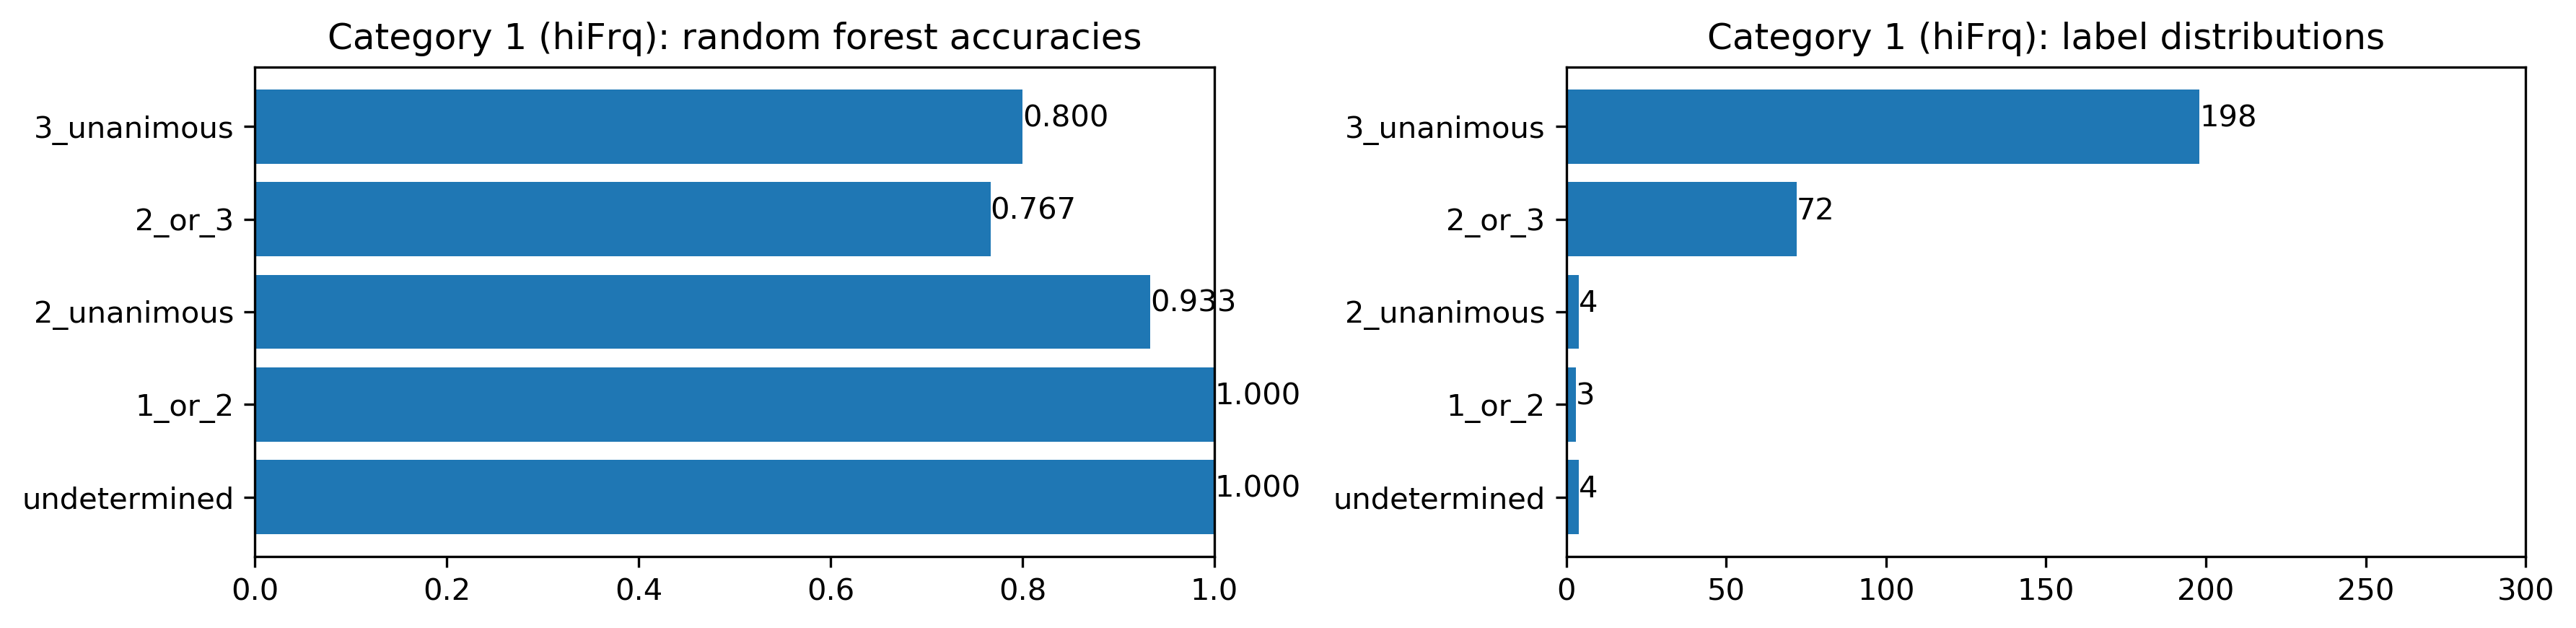

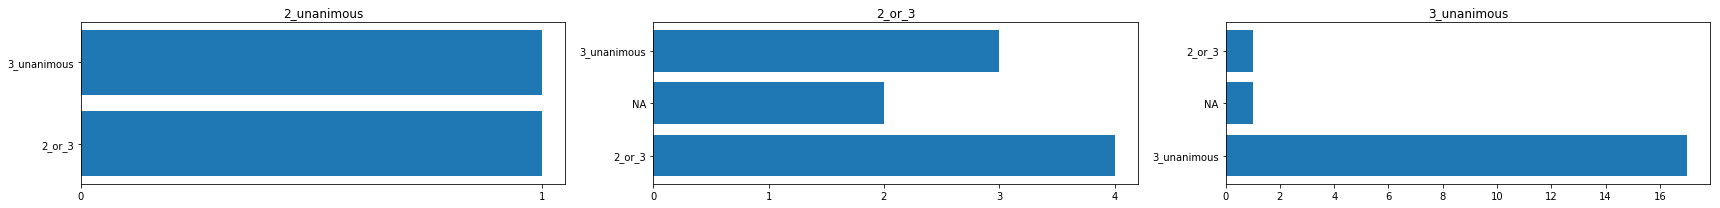

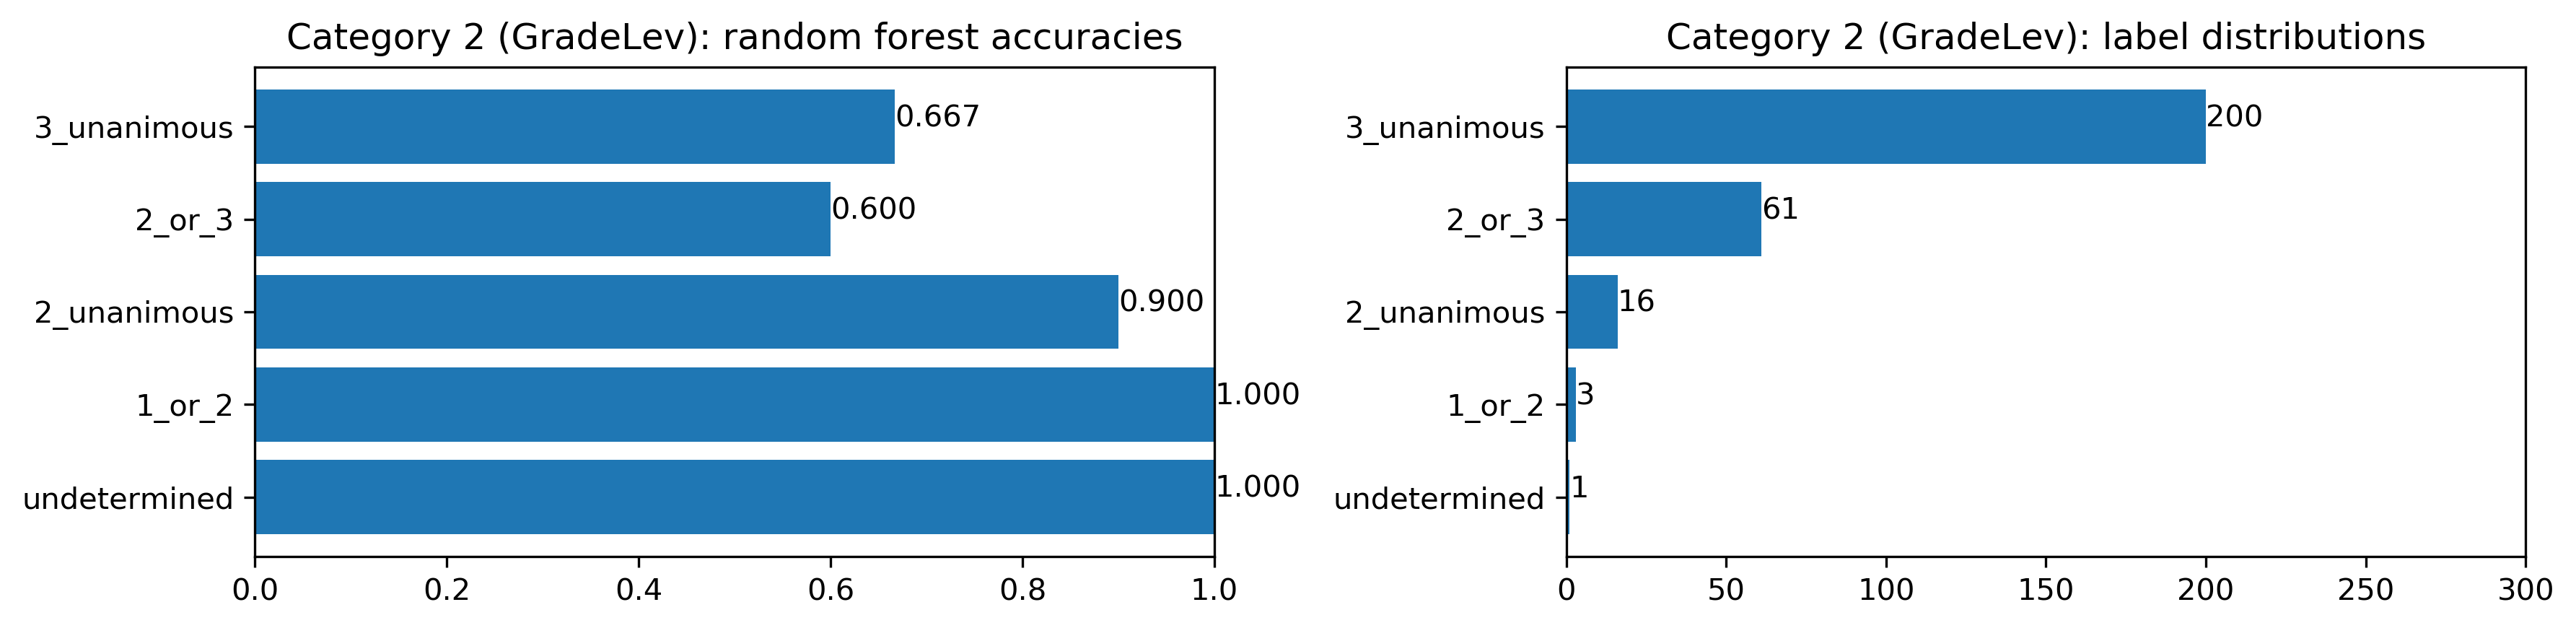

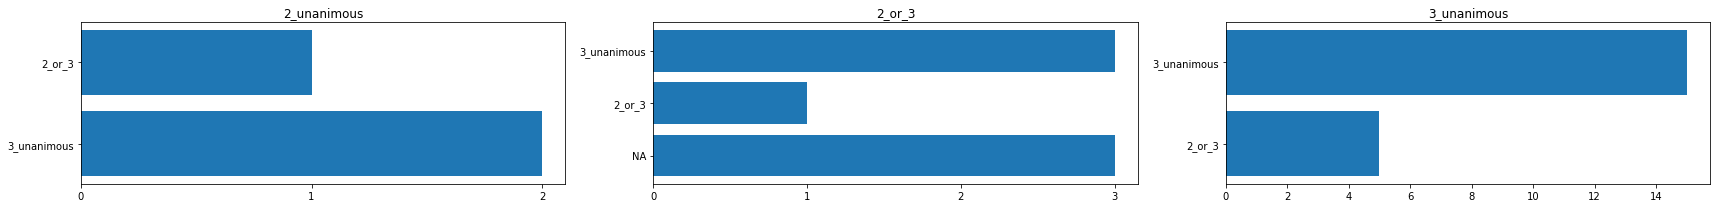

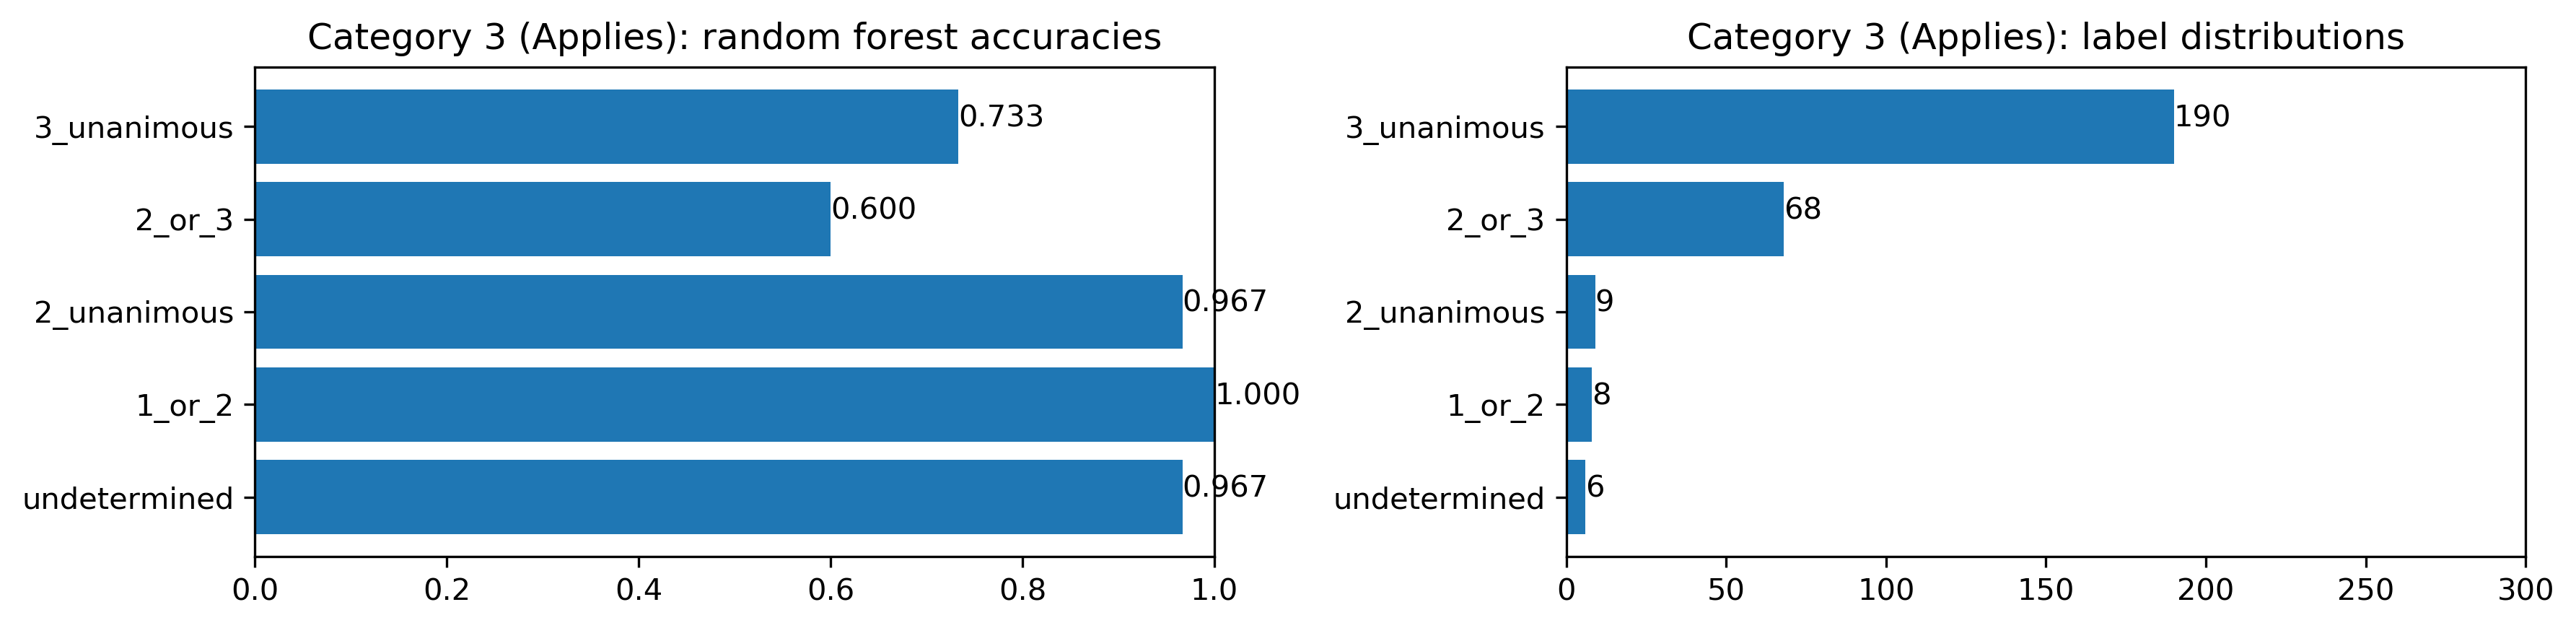

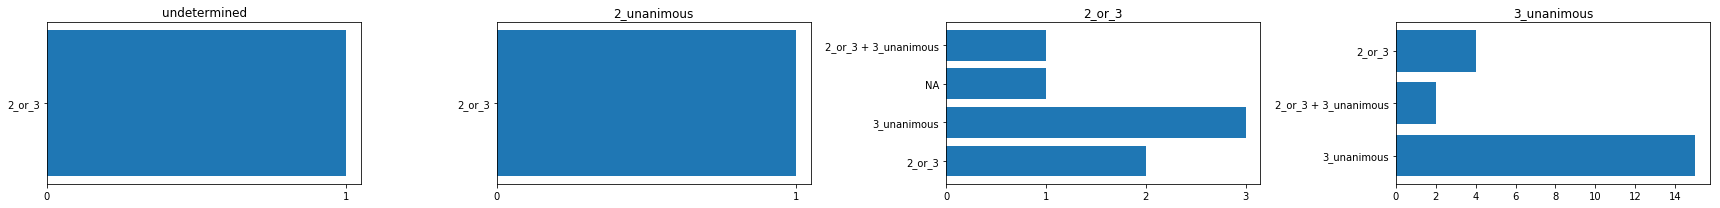

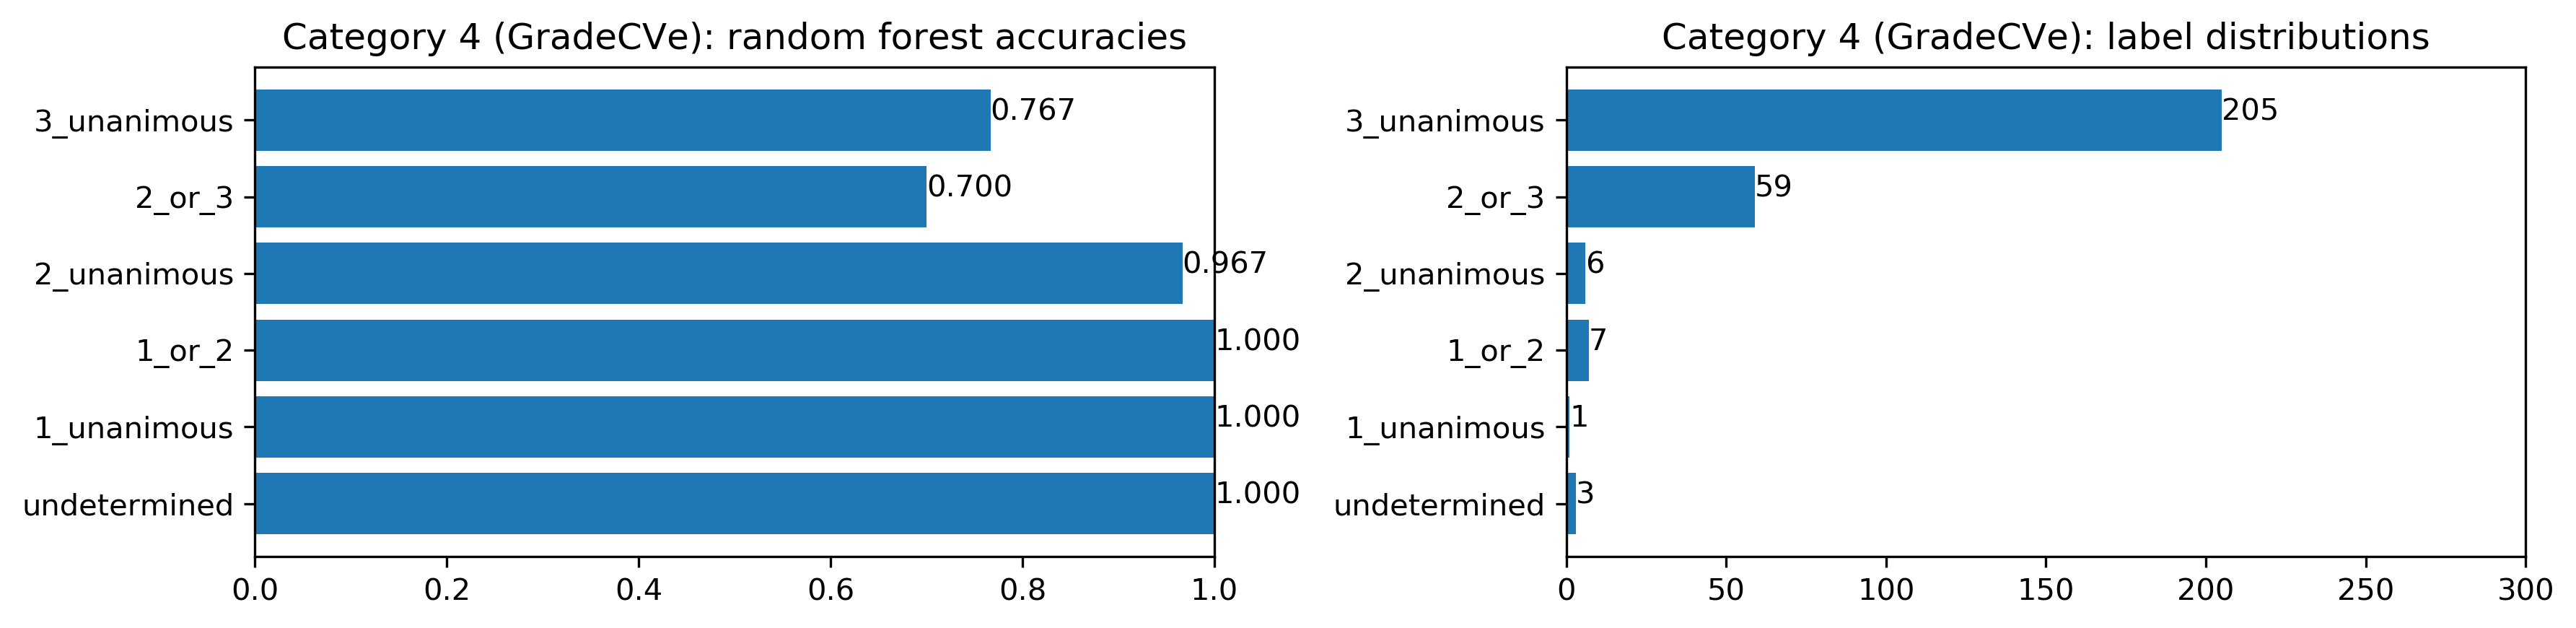

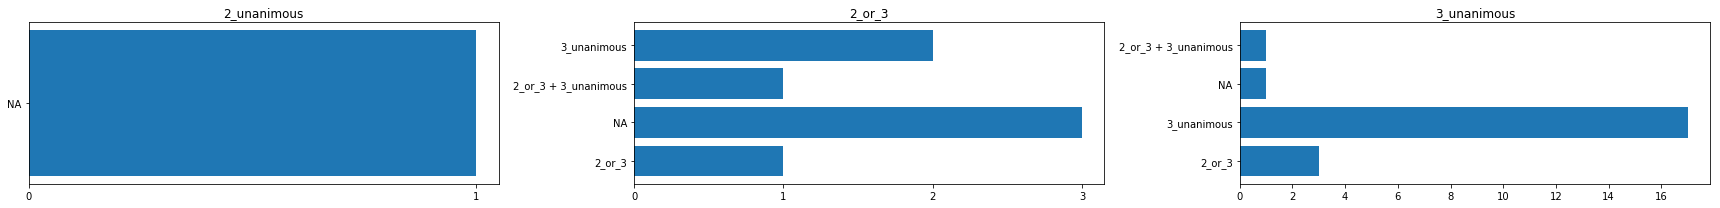

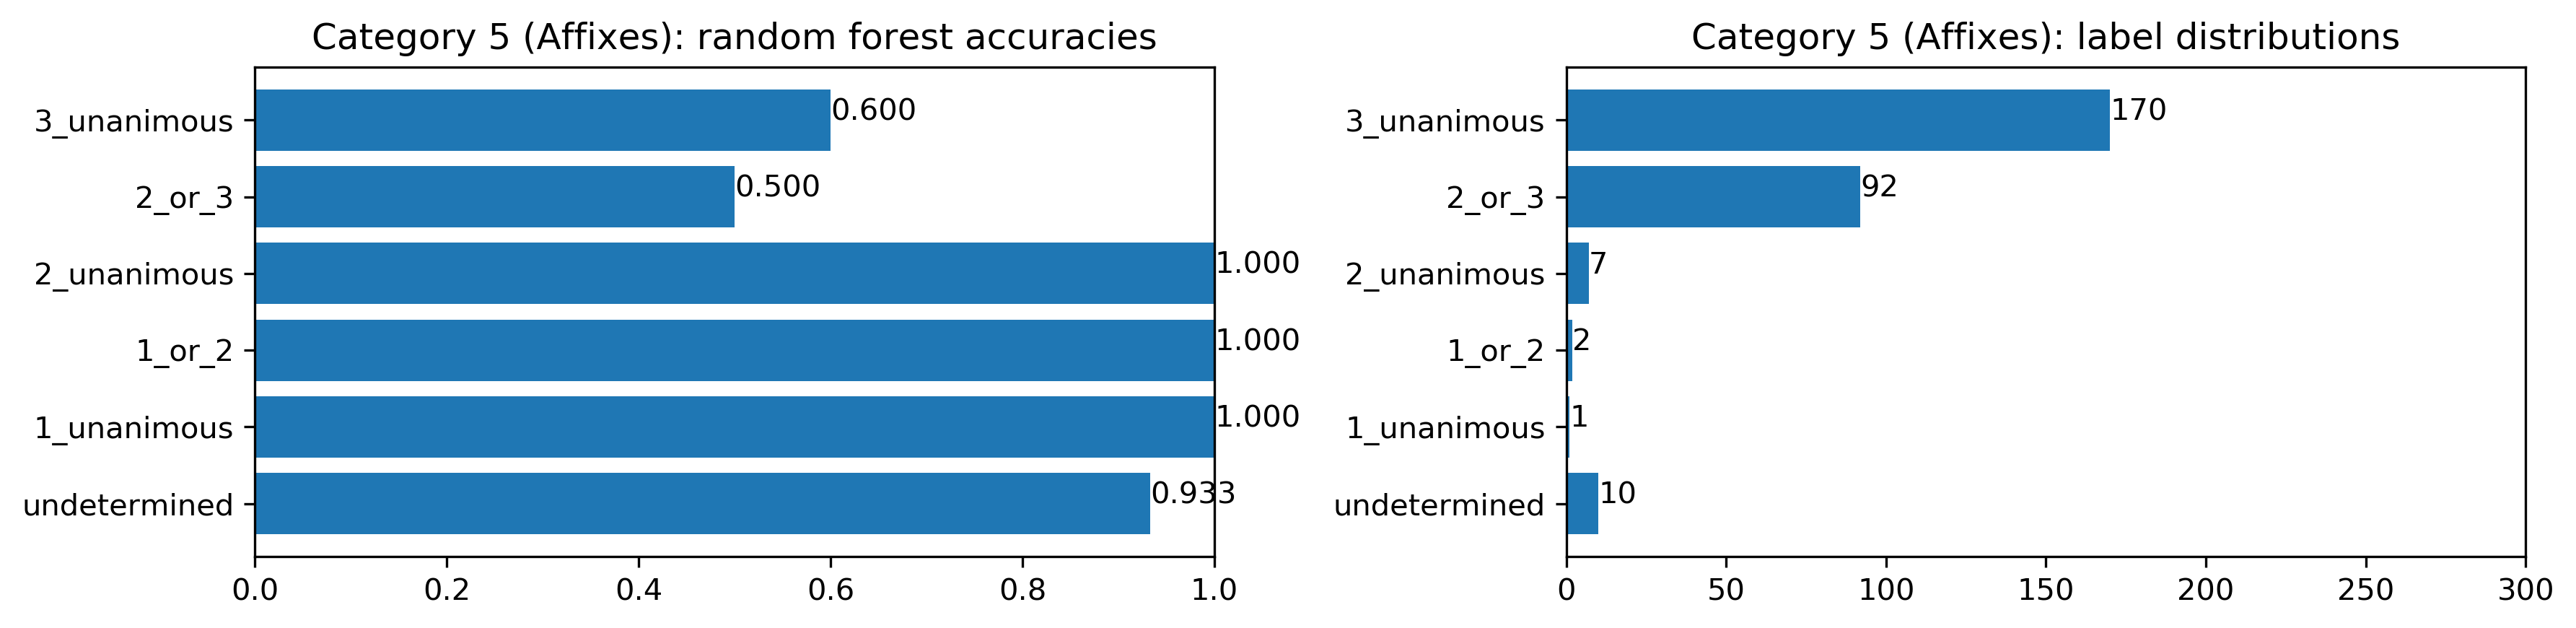

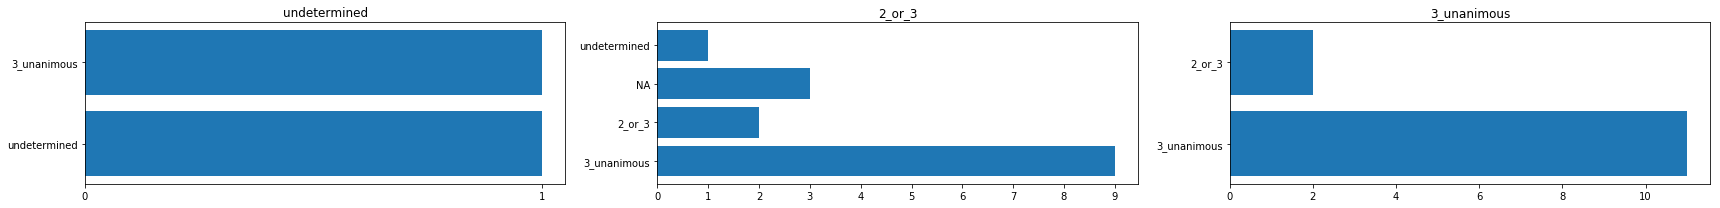

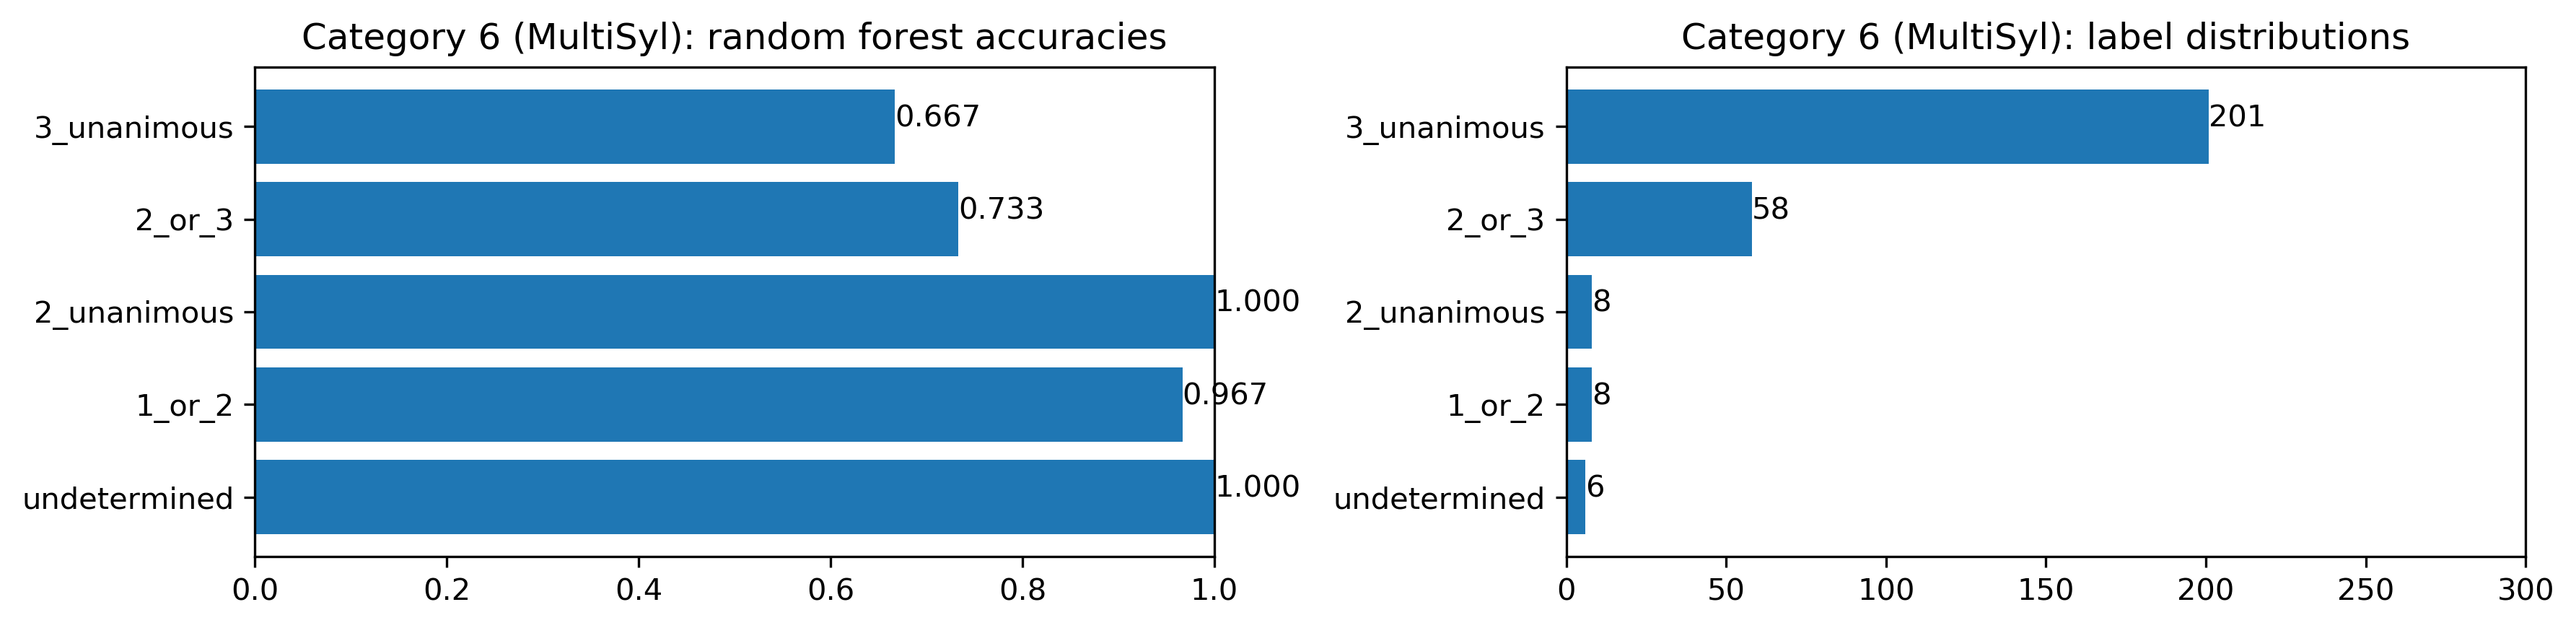

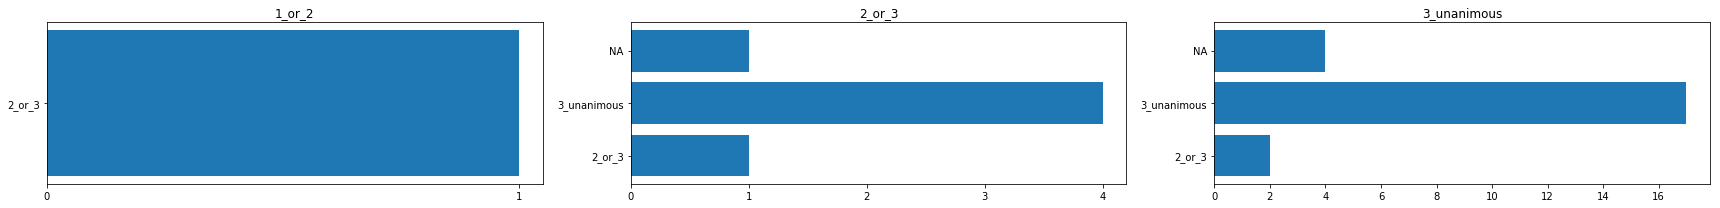

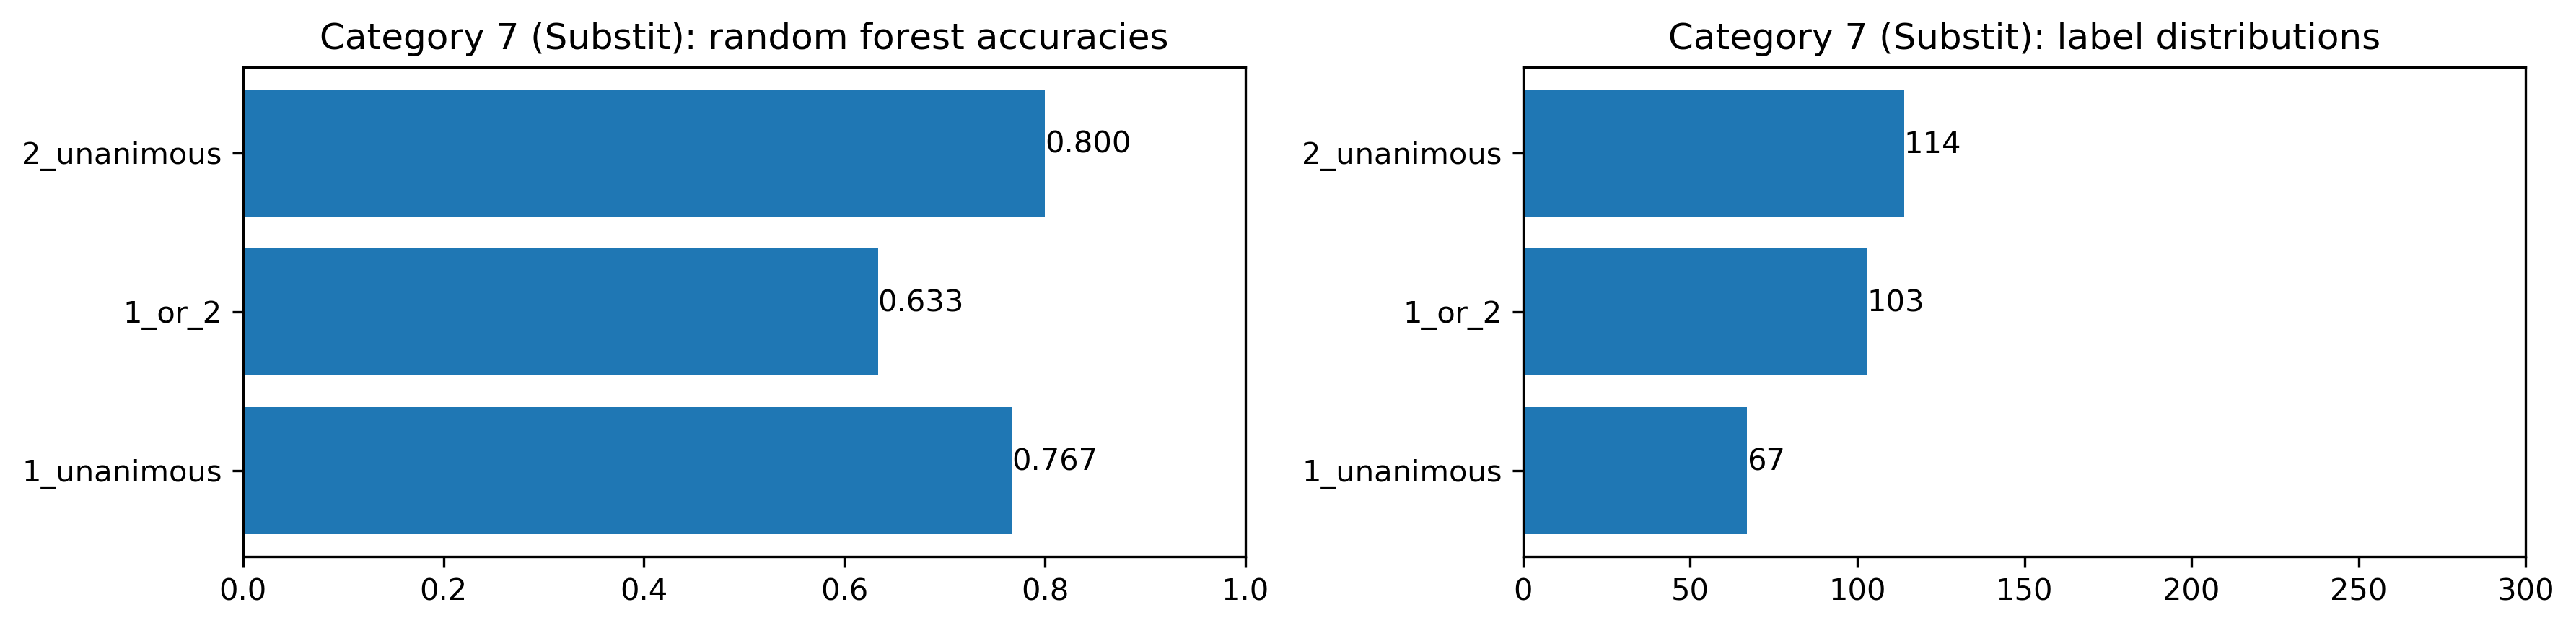

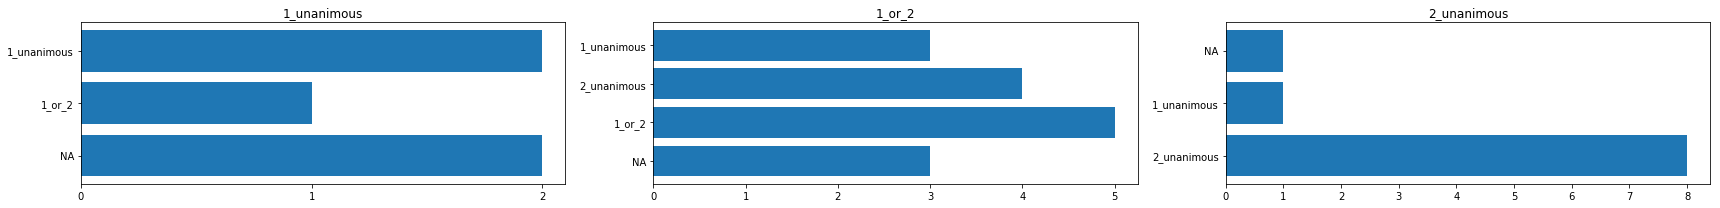

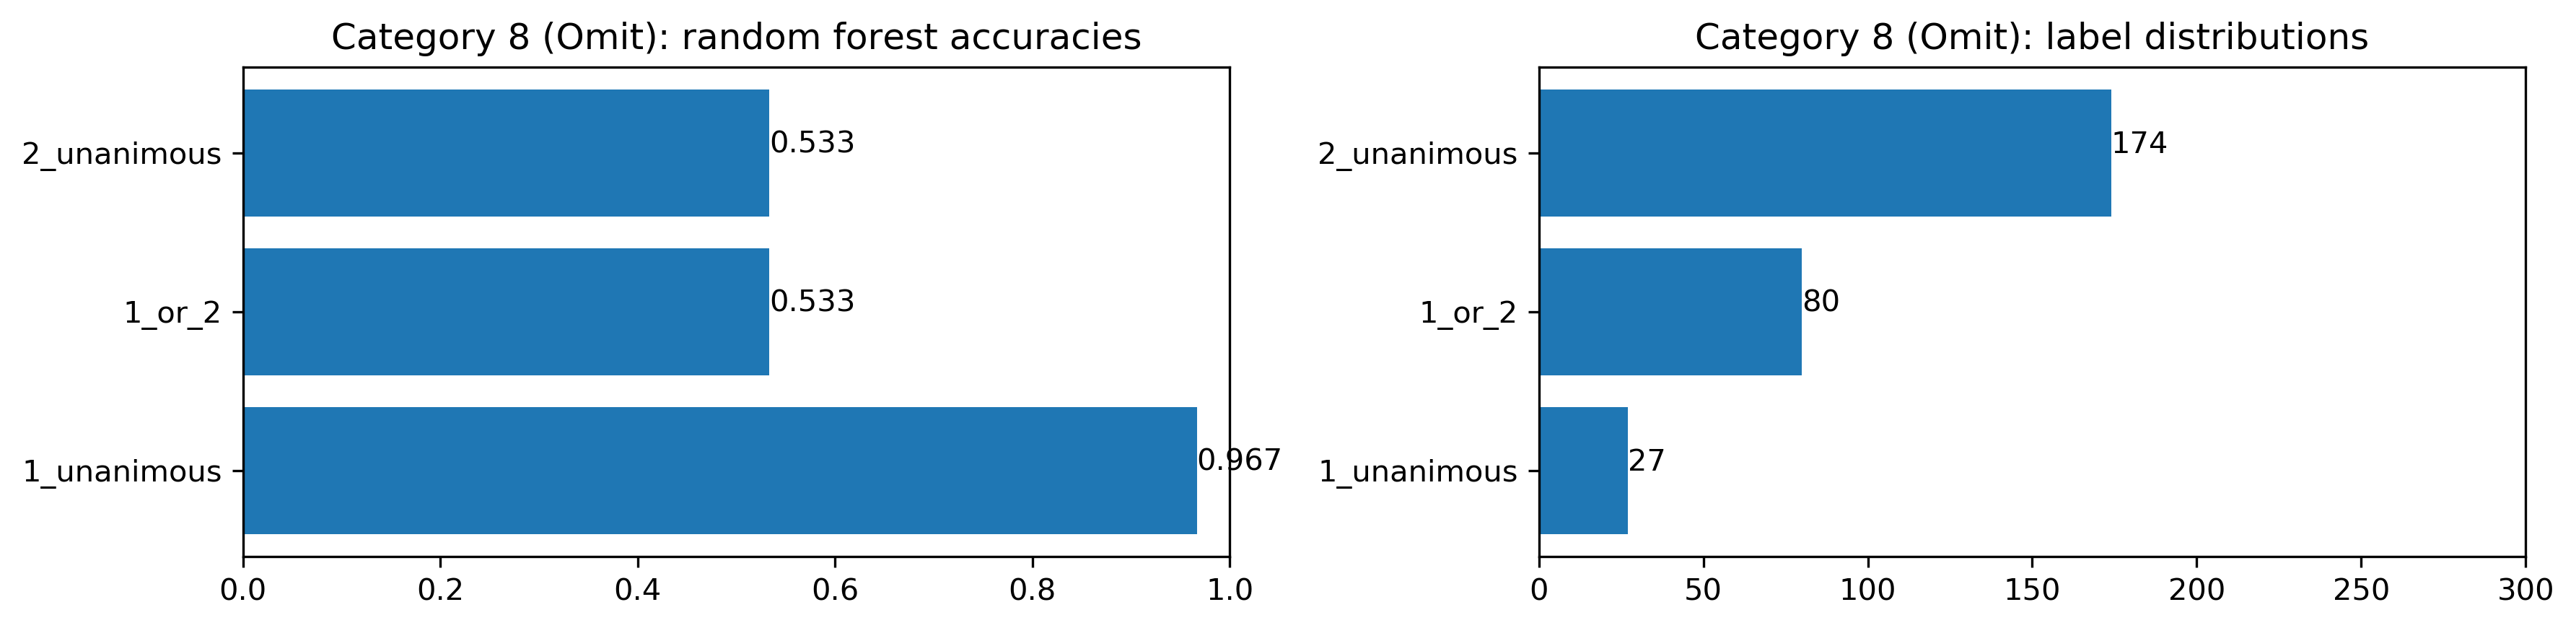

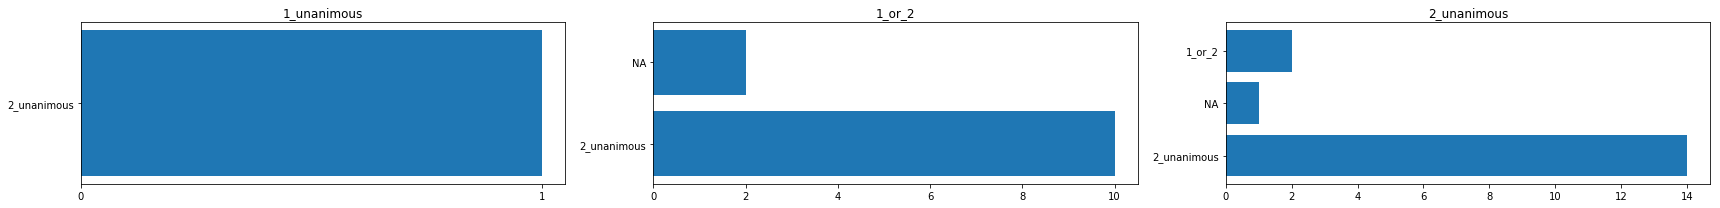

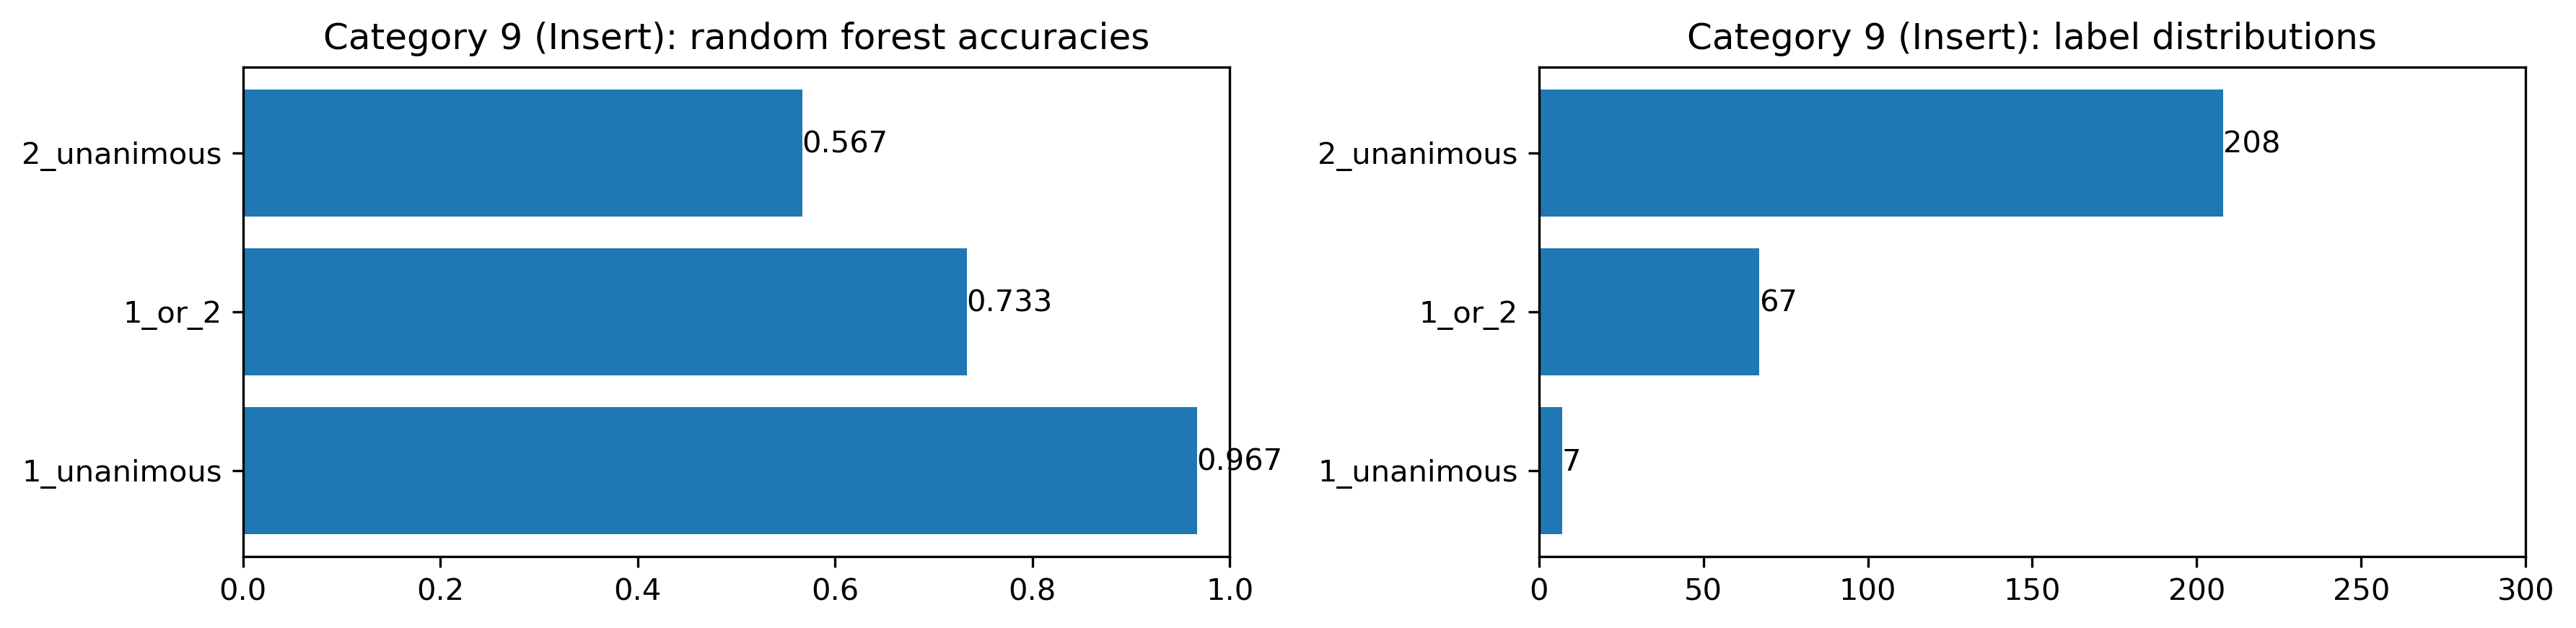

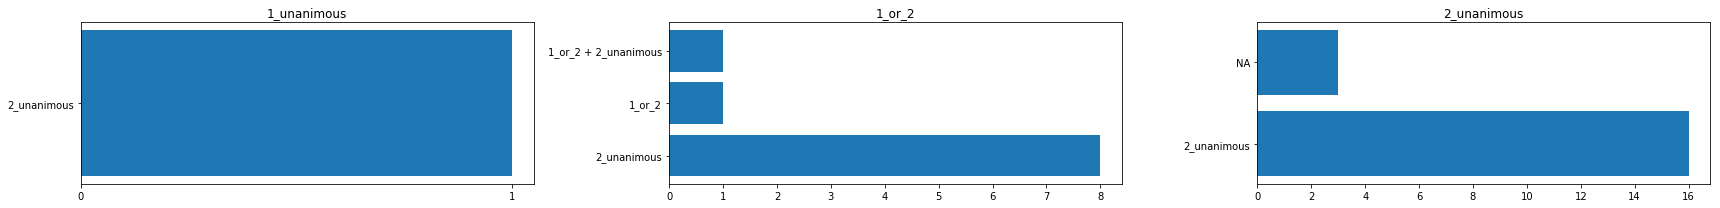

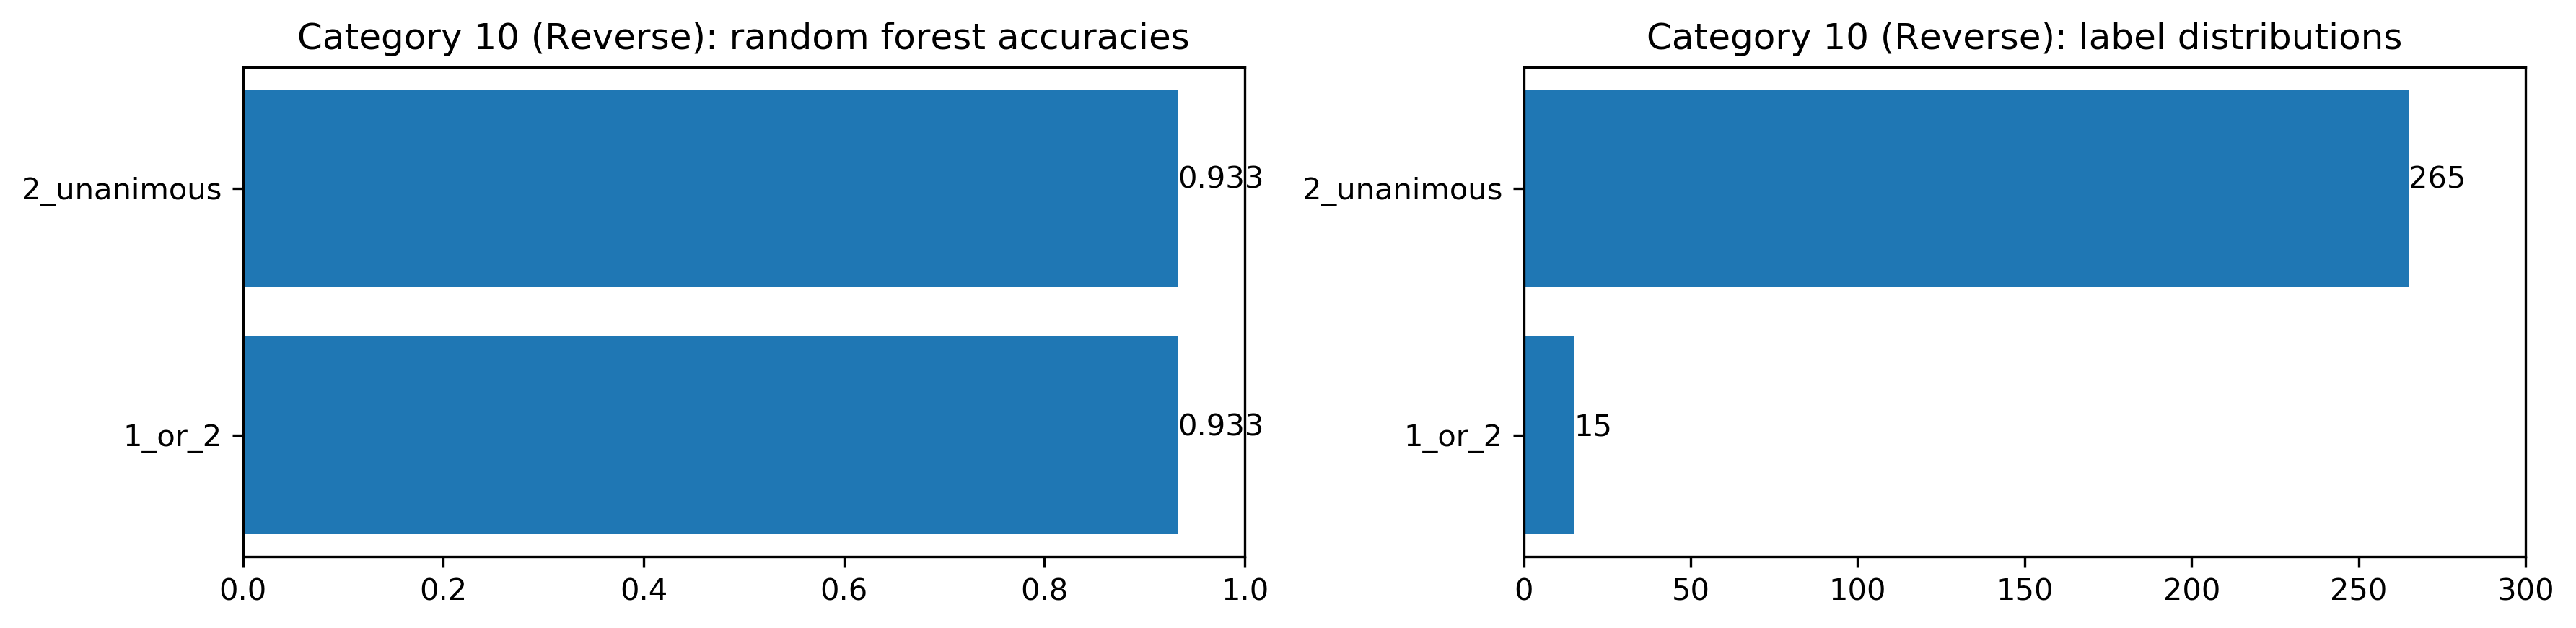

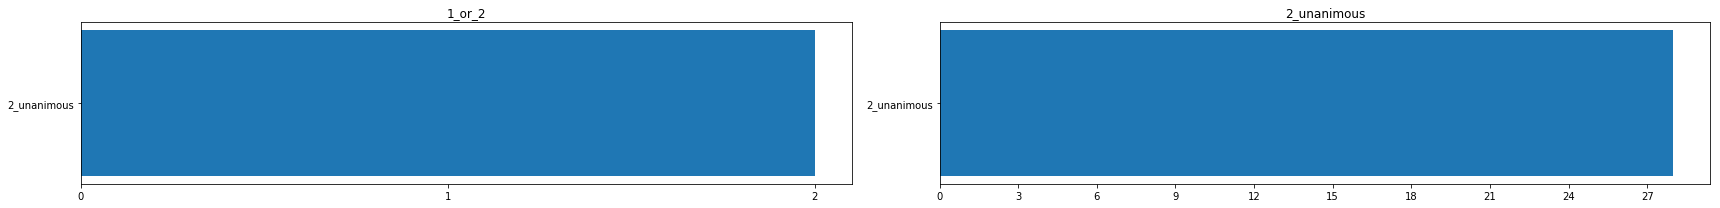

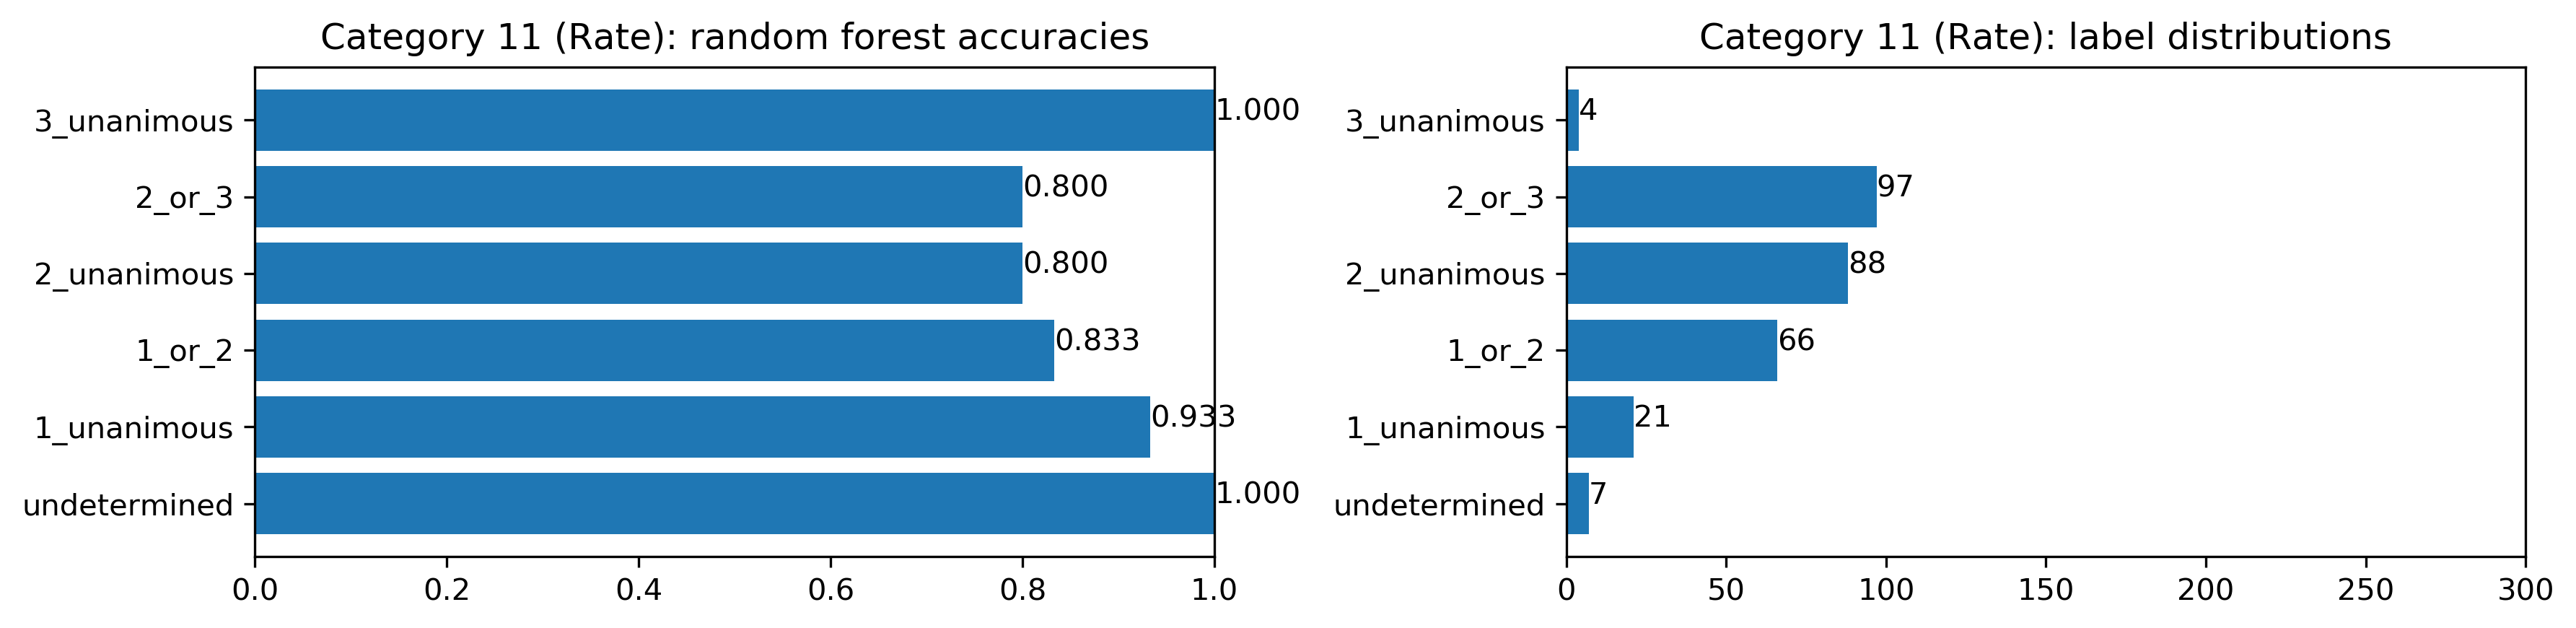

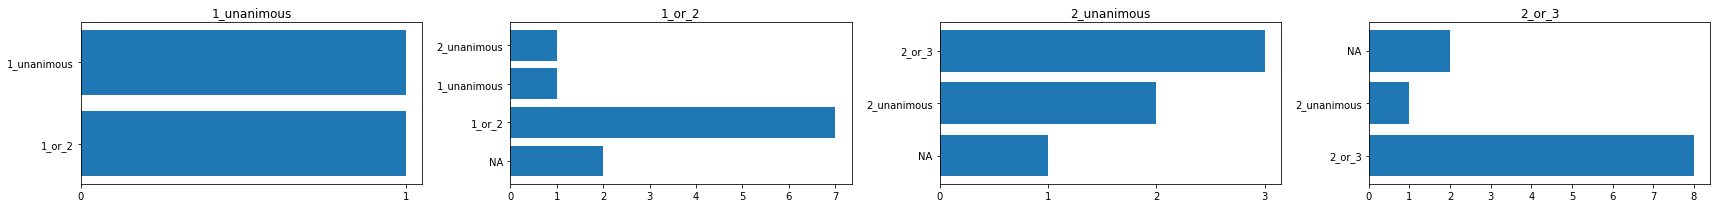

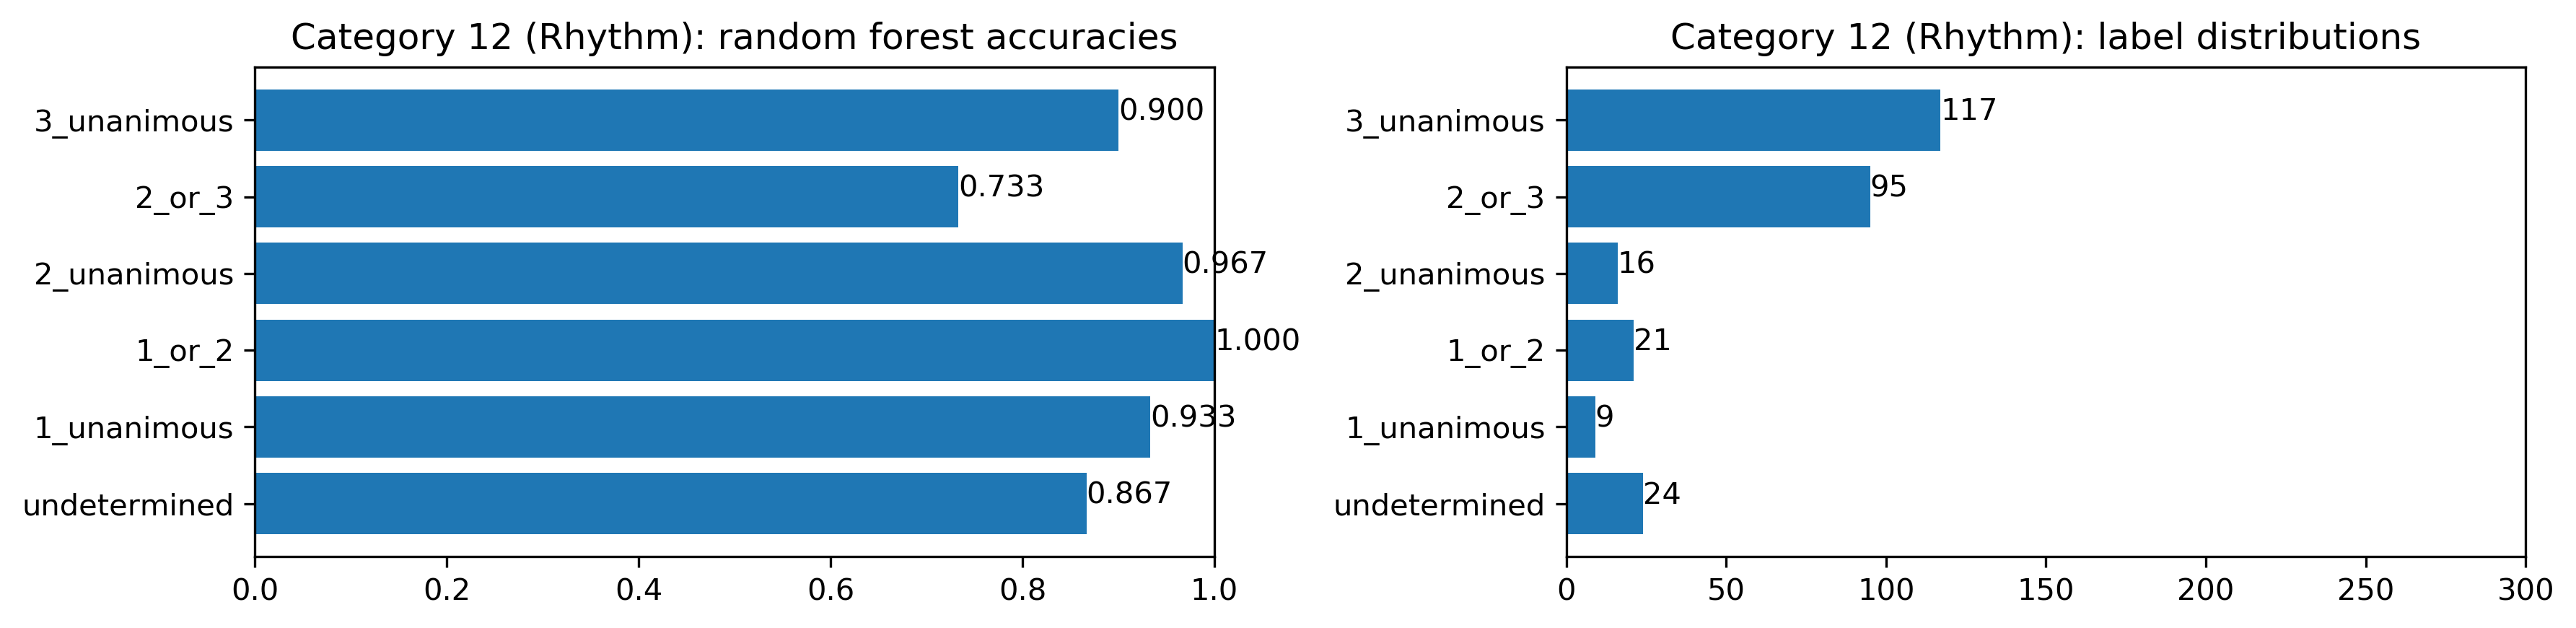

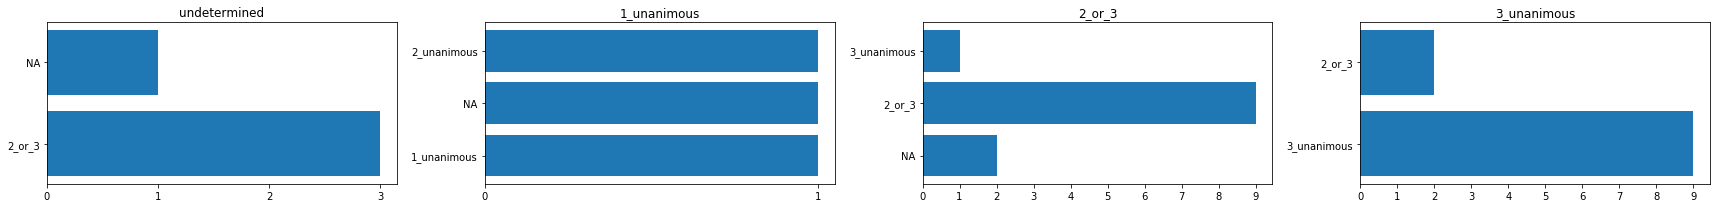

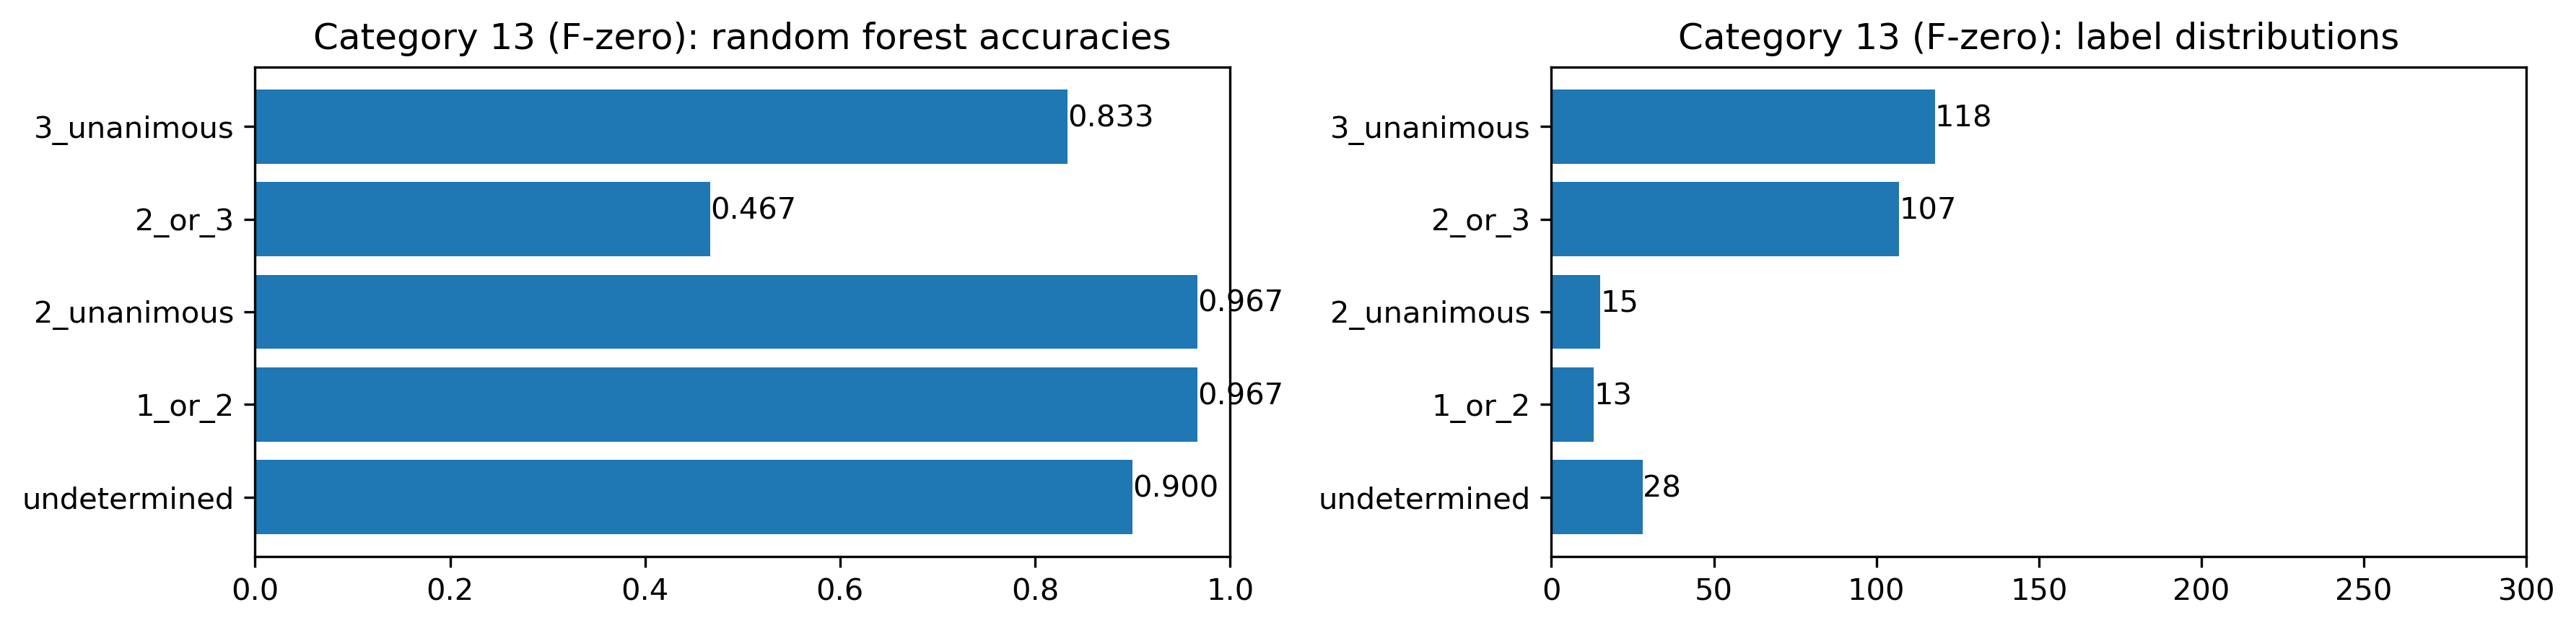

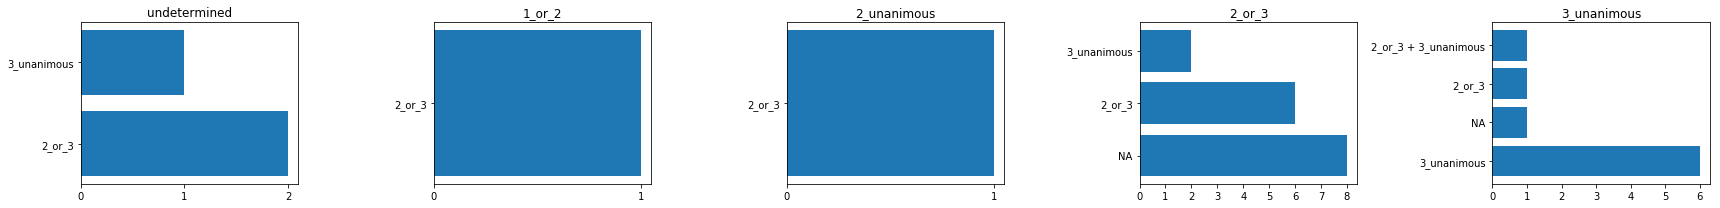

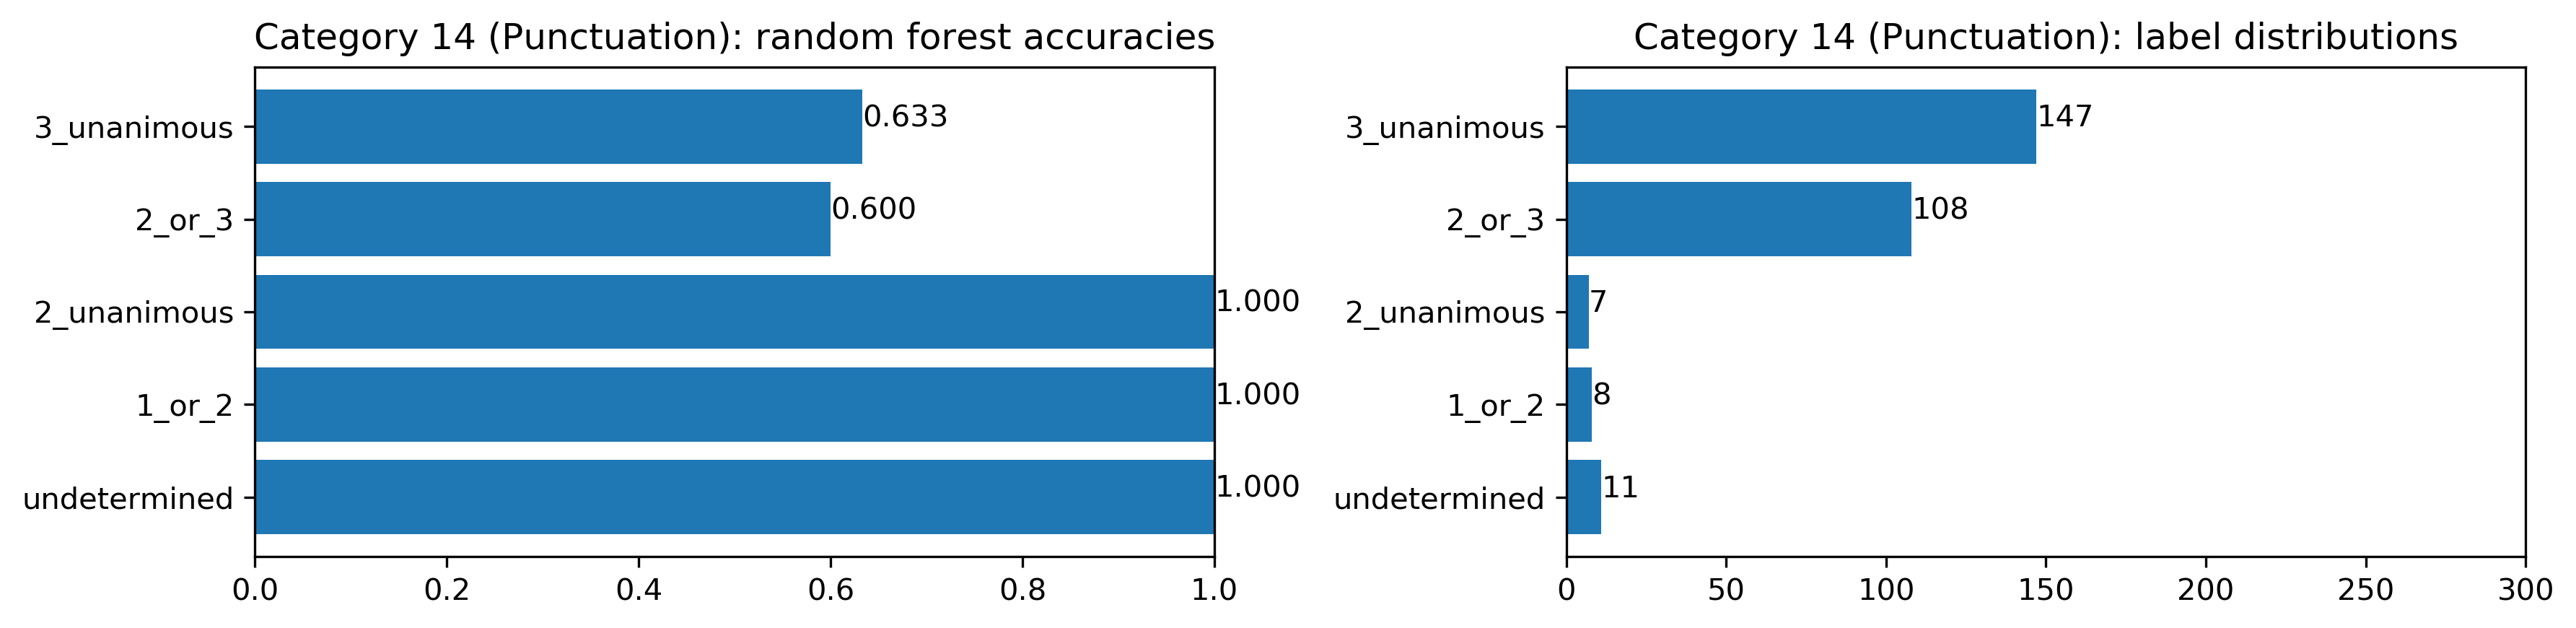

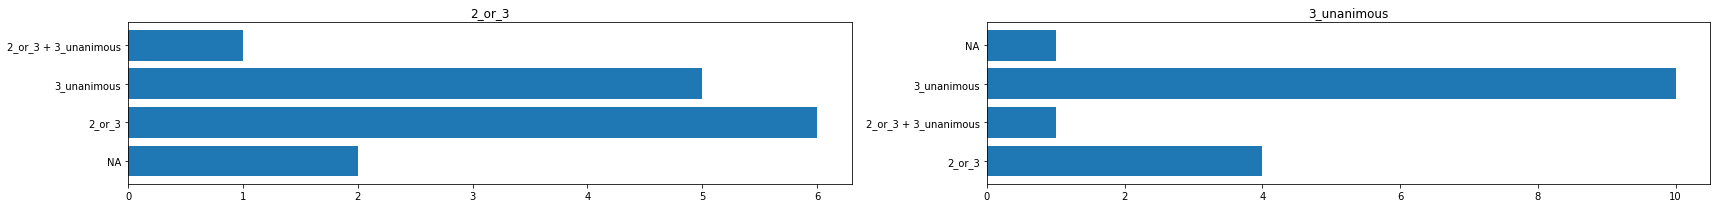

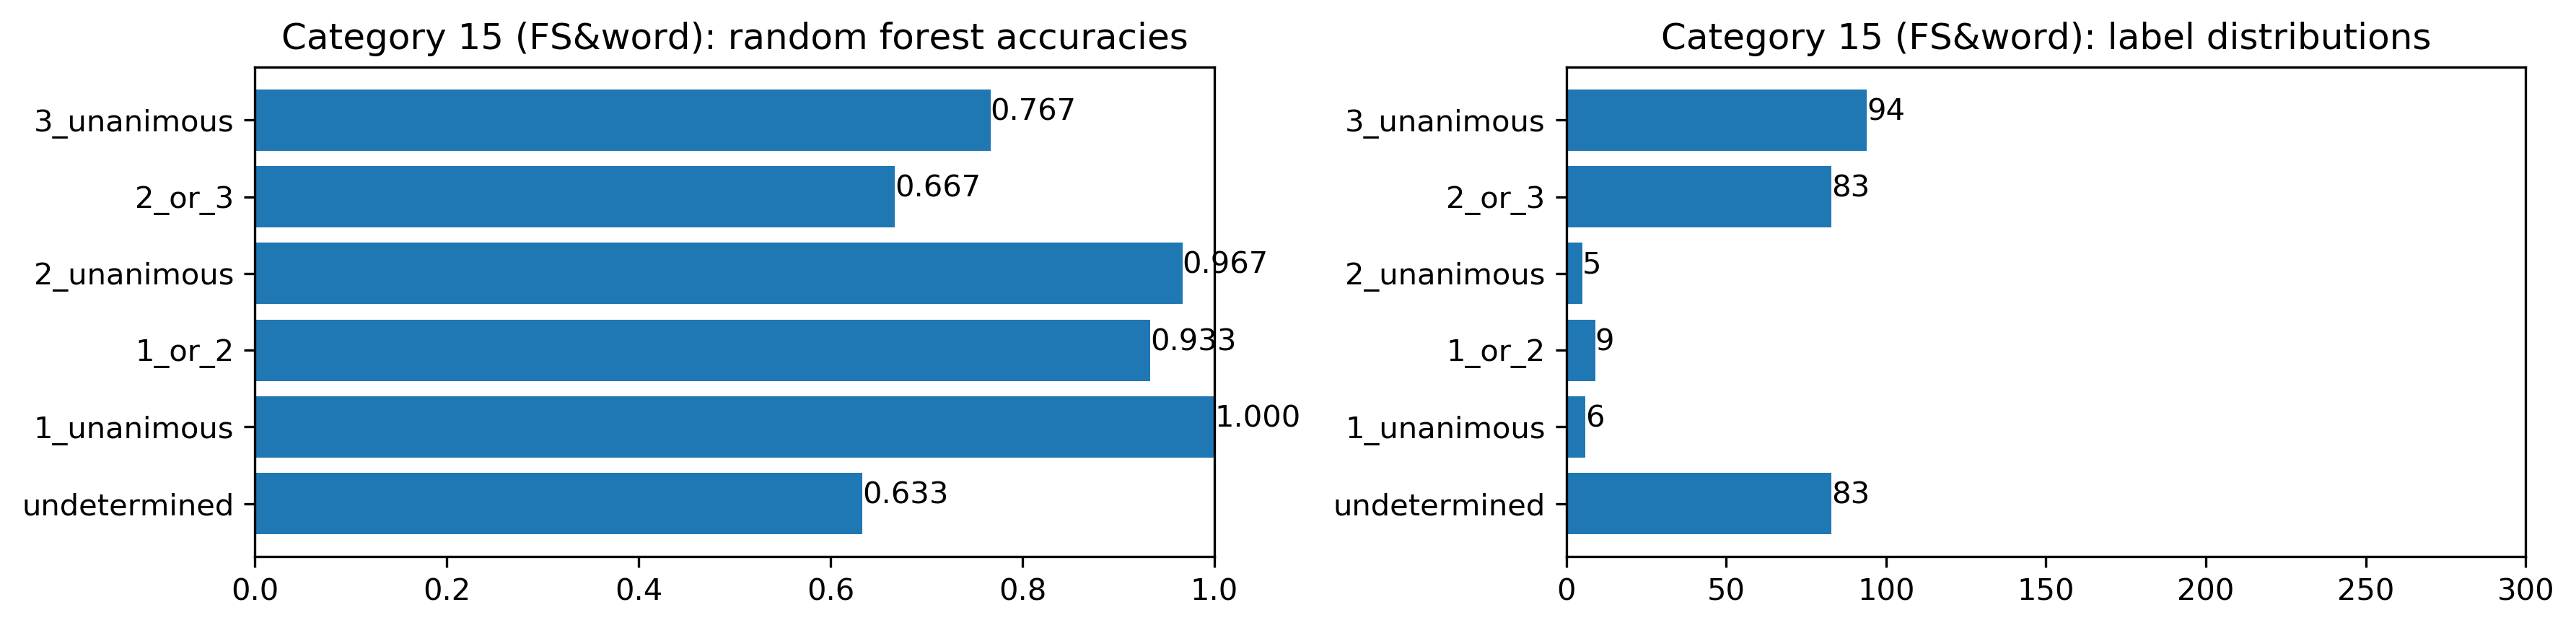

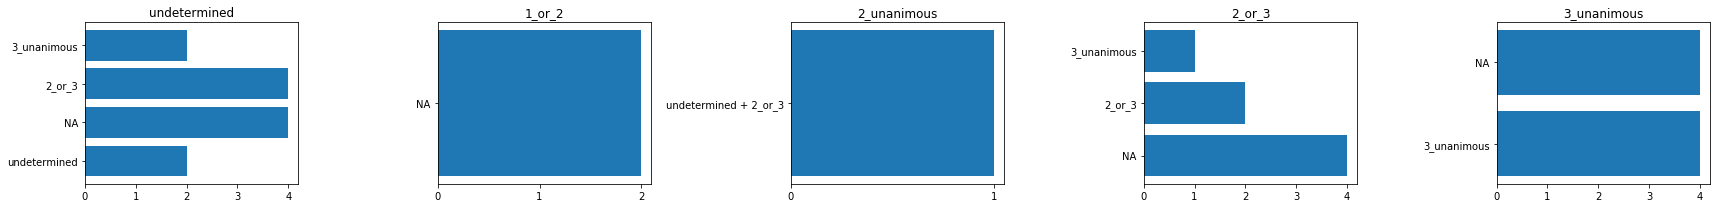

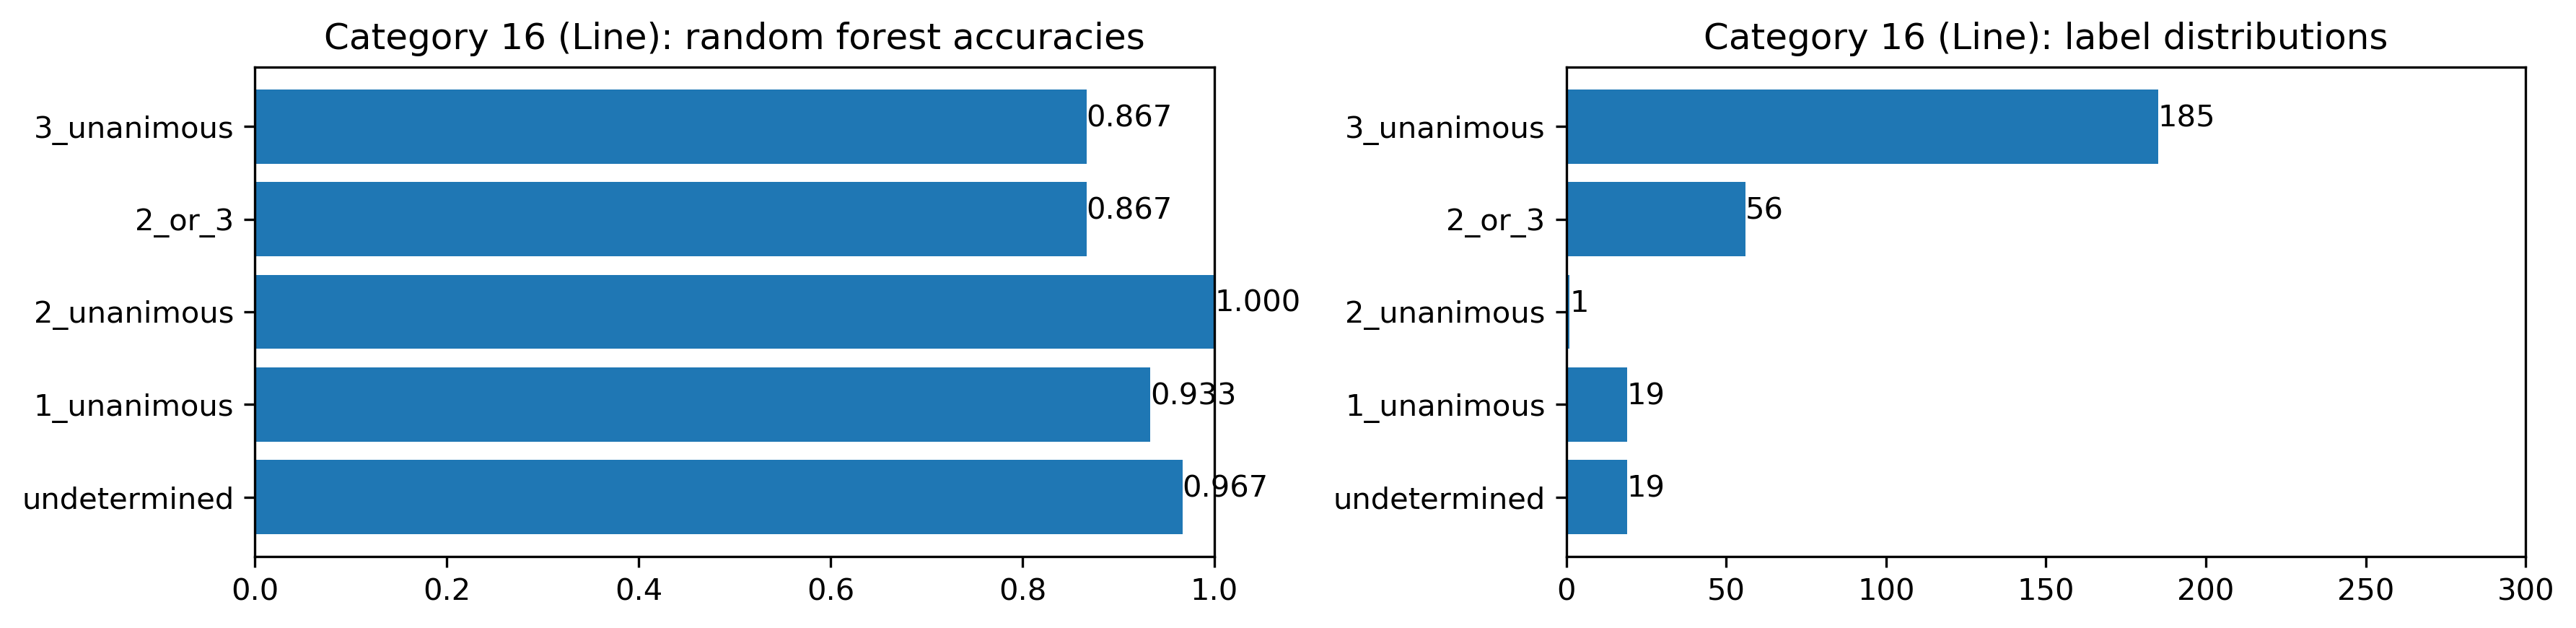

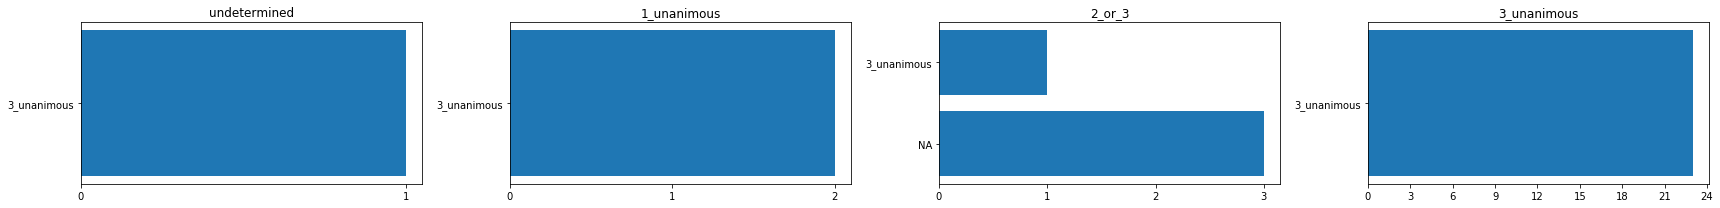

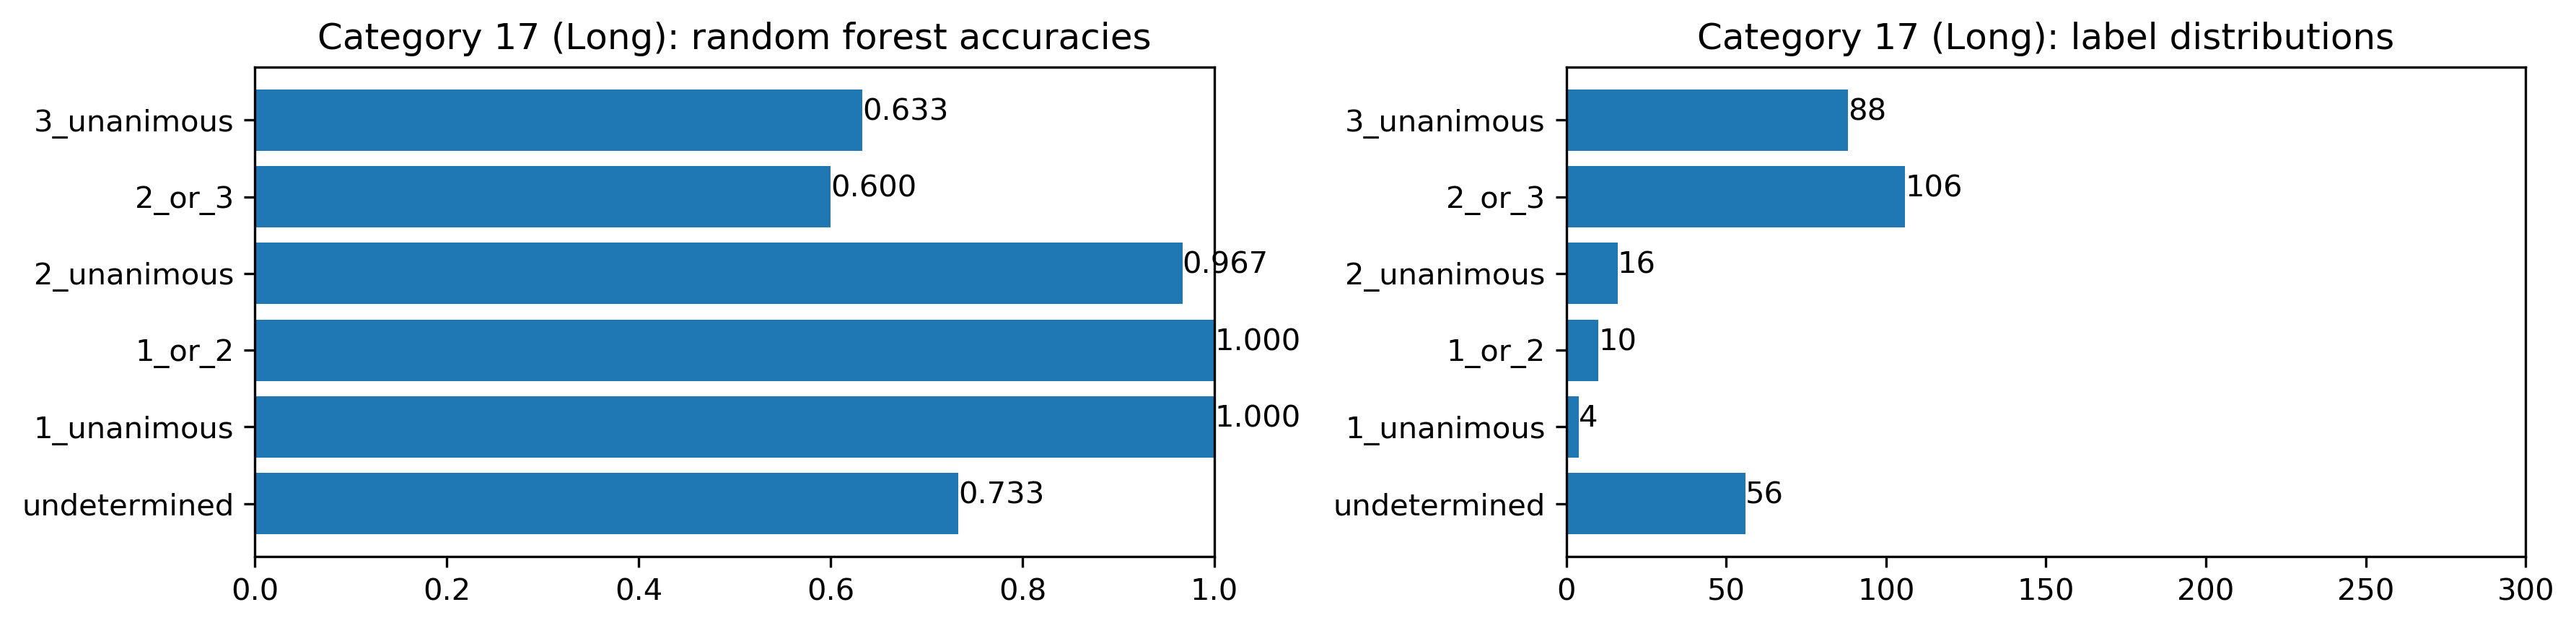

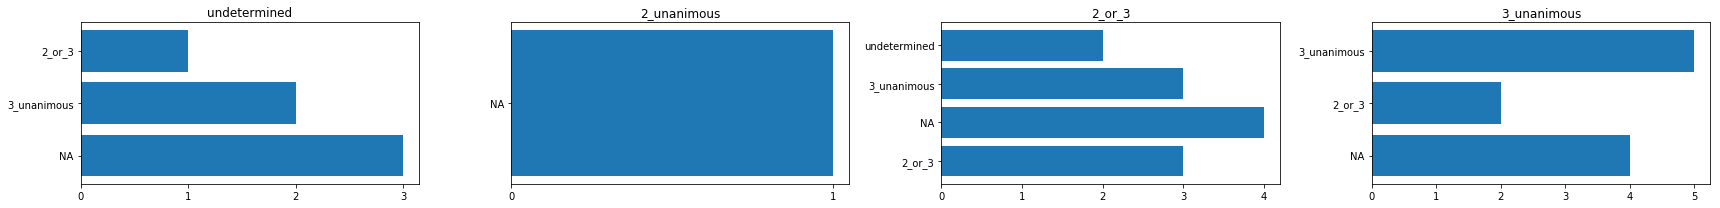

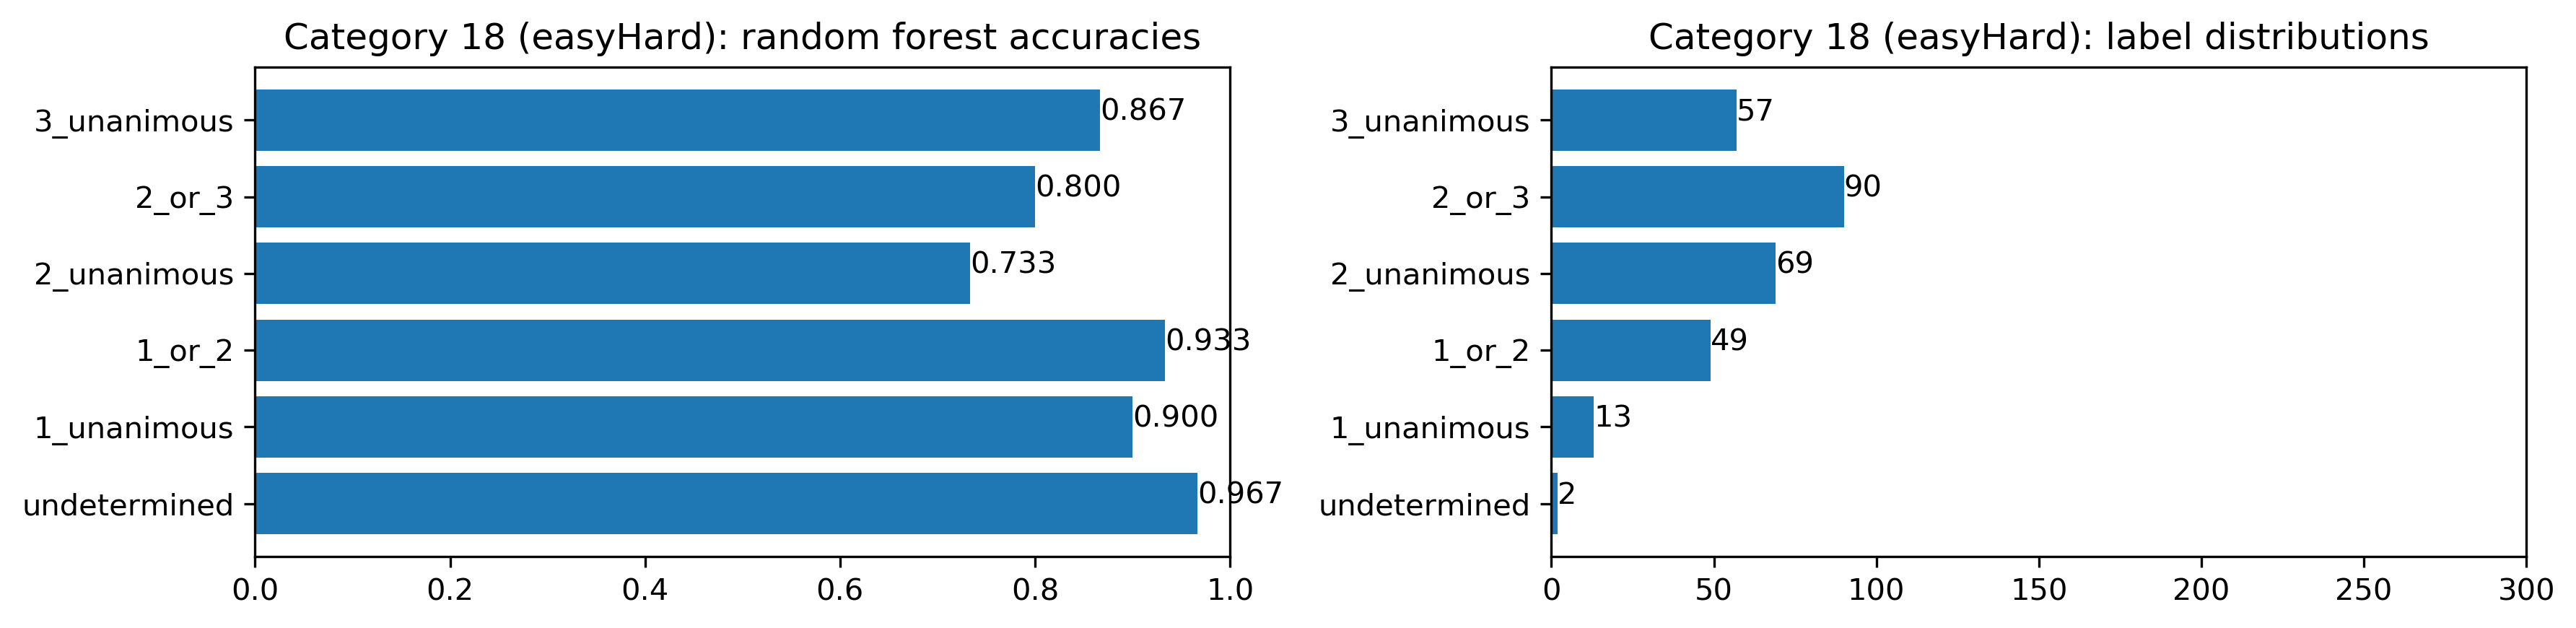

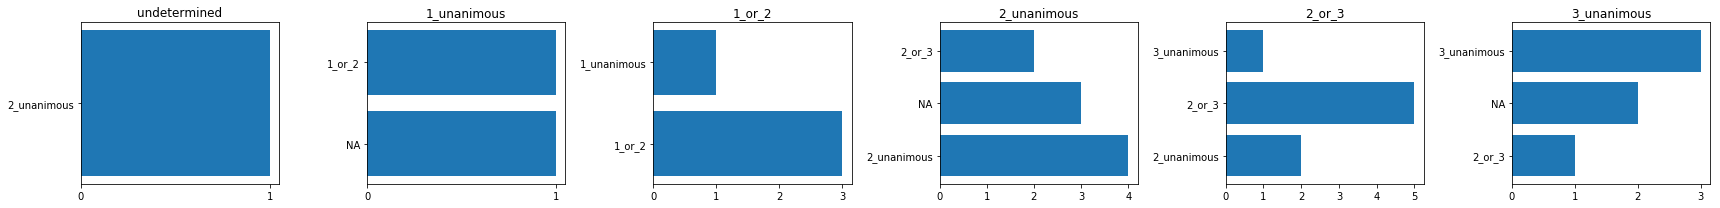

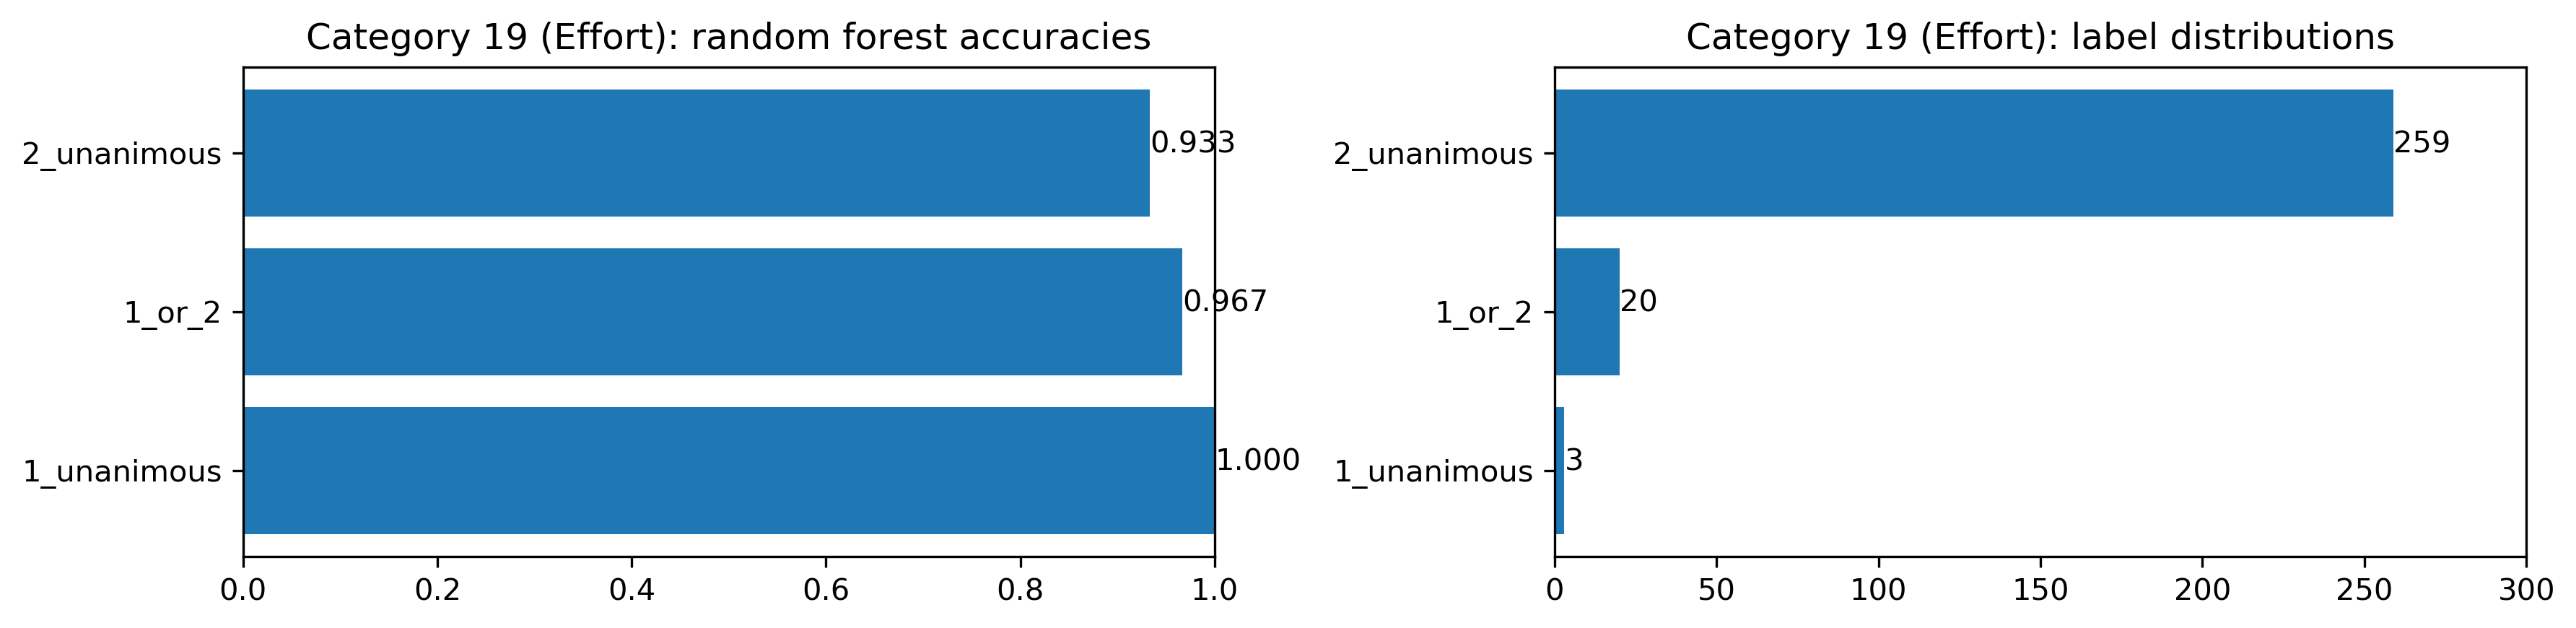

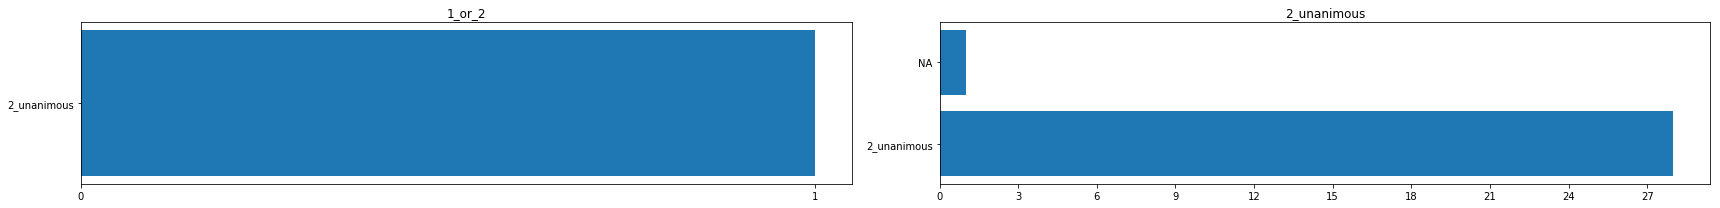

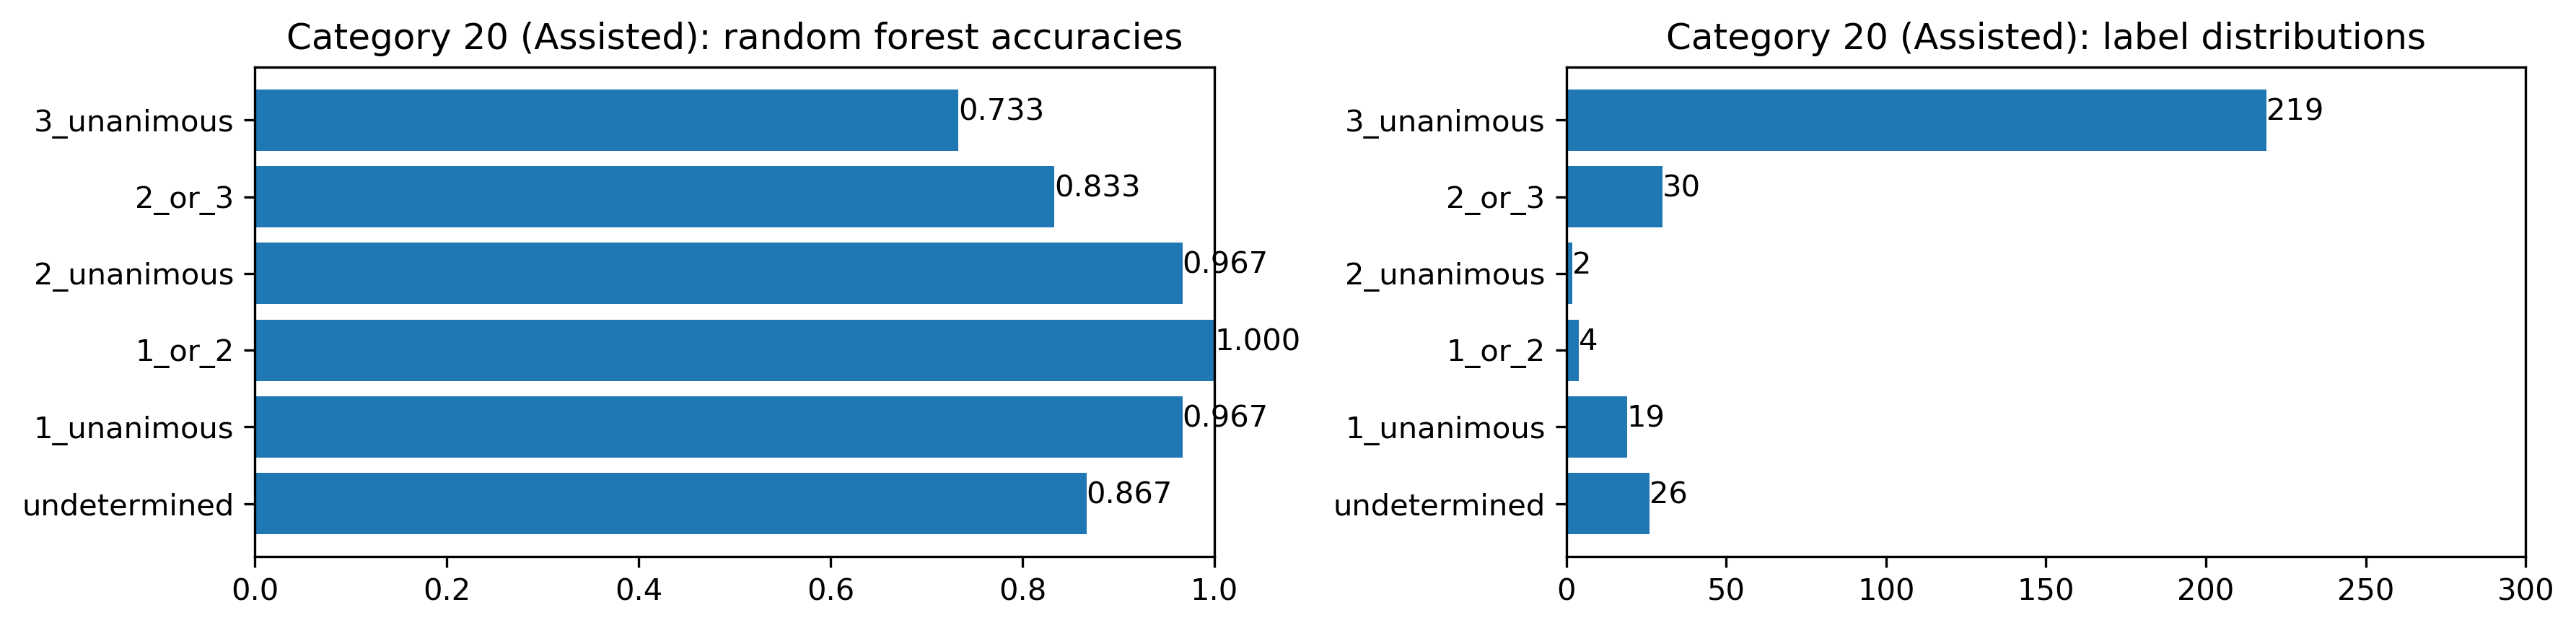

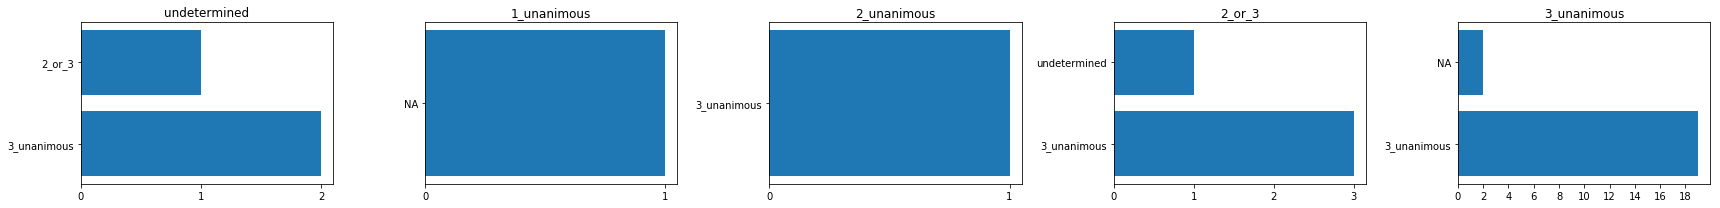

In [73]:
for i in range(1, 21):
    CSV = '../predicting-annotation-fields/{}_table.csv'.format(i)
    classifier_results = classify(CSV)
    
    columns           = classifier_results['columns']
    accuracies        = classifier_results['accuracies']
    label_frequencies = classifier_results['label_frequencies']
    predictions       = classifier_results['predictions']
    true_labels       = classifier_results['true_labels']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), dpi=300)
    title = 'Category {} ({}):'.format(i, category_to_desc[str(i)])
    ax1.set_title(title + ' random forest accuracies')
    ax2.set_title(title + ' label distributions')
    ax1.barh(columns, accuracies)
    ax2.barh(columns, label_frequencies)
    ax1.set_xlim(0, 1)
    ax2.set_xlim(0, 300)
    
    for index, value in enumerate(accuracies):
        ax1.text(value, index, '{:.3f}'.format(value))
    for index, value in enumerate(label_frequencies):
        ax2.text(value, index, str(value))
    
    fig.tight_layout()
    plt.show()
#     break
    
    counters = []
    for i, column in enumerate(columns):
        positives = Counter()
        true_label = true_labels[i]
        prediction = predictions[i]

        for j, (pred, label) in enumerate(zip(prediction, true_label)):
            category = []
            if label == 1:
                for k, col in enumerate(columns):
                    if predictions[k][j] == 1:
                        category.append(col)
                category = ' + '.join(category) if category else 'NA'
                positives[category] += 1


        counters.append(positives)
    
    to_plot = []
    for column, counter in zip(columns, counters):
        c = dict(counter)
        if c:
            to_plot.append((column, c))
    
    fig, axs = plt.subplots(1, len(to_plot), figsize=(24, 3))
#     fig.suptitle('Positive labels')
    for i, ax in enumerate(axs):
        column, counter = to_plot[i]
        ax.set_title(column)
        ax.barh(*zip(*dict(counter).items()))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
    fig.tight_layout()
    